# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

#from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       3
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105490
project_essay_4                                 105490
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

### Missing value Treatment

In [4]:
project_data['teacher_prefix']=project_data['teacher_prefix'].ffill()

In [5]:
project_data=project_data.fillna(' ')

In [6]:
project_data['project_essay_3'][20000]

' '

In [7]:
resource_data.isnull().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

In [8]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [9]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [10]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

In [11]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [12]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [13]:
project_data.shape

(109248, 19)

In [14]:
project_data['project_is_approved'].value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

## 1.2 preprocessing of `project_subject_categories`

In [15]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


In [16]:
print(sorted_cat_dict)

{'Warmth': 1388, 'Care_Hunger': 1388, 'History_Civics': 5914, 'Music_Arts': 10293, 'AppliedLearning': 12135, 'SpecialNeeds': 13642, 'Health_Sports': 14223, 'Math_Science': 41421, 'Literacy_Language': 52239}


## 1.3 preprocessing of `project_subject_subcategories`

In [17]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

In [18]:
print(sorted_sub_cat_dict)

{'Economics': 269, 'CommunityService': 441, 'FinancialLiteracy': 568, 'ParentInvolvement': 677, 'Extracurricular': 810, 'Civics_Government': 815, 'ForeignLanguages': 890, 'NutritionEducation': 1355, 'Warmth': 1388, 'Care_Hunger': 1388, 'SocialSciences': 1920, 'PerformingArts': 1961, 'CharacterEducation': 2065, 'TeamSports': 2192, 'Other': 2372, 'College_CareerPrep': 2568, 'Music': 3145, 'History_Geography': 3171, 'Health_LifeScience': 4235, 'EarlyDevelopment': 4254, 'ESL': 4367, 'Gym_Fitness': 4509, 'EnvironmentalScience': 5591, 'VisualArts': 6278, 'Health_Wellness': 10234, 'AppliedSciences': 10816, 'SpecialNeeds': 13642, 'Literature_Writing': 22179, 'Mathematics': 28074, 'Literacy': 33700}


### Processing of project_grade_subcategories

In [19]:
grade_categories=list(project_data['project_grade_category'].values)

grade_list=[]

for i in grade_categories:
    temp=""
    for j in i.split(','):
        if 'The' in j.split():
            j=j.replace('The','')
        j=j.replace(' ','')
        temp+=j.strip()+" "
        temp=temp.replace('-','_')
    grade_list.append(temp.strip())
    
    
project_data['project_grade_category']=grade_list

from collections import Counter
my_counter=Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
    
    
grade_dict=dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))


In [20]:
print(sorted_grade_dict)

{'Grades9_12': 10963, 'Grades6_8': 16923, 'Grades3_5': 37137, 'GradesPreK_2': 44225}


In [21]:
project_data['school_state'].value_counts()

CA    15388
TX     7396
NY     7318
FL     6185
NC     5091
IL     4350
GA     3963
SC     3936
MI     3161
PA     3109
IN     2620
MO     2576
OH     2467
LA     2394
MA     2389
WA     2334
OK     2276
NJ     2237
AZ     2147
VA     2045
WI     1827
AL     1762
UT     1731
TN     1688
CT     1663
MD     1514
NV     1367
MS     1323
KY     1304
OR     1242
MN     1208
CO     1111
AR     1049
ID      693
IA      666
KS      634
NM      557
DC      516
HI      507
ME      505
WV      503
NH      348
AK      345
DE      343
NE      309
SD      300
RI      285
MT      245
ND      143
WY       98
VT       80
Name: school_state, dtype: int64

In [22]:
from collections import Counter
my_counter_state=Counter()
for word in project_data['school_state'].values:
    my_counter_state.update(word.split())
    
    
state_dict=dict(my_counter_state)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))


In [23]:
print(sorted_state_dict)

{'VT': 80, 'WY': 98, 'ND': 143, 'MT': 245, 'RI': 285, 'SD': 300, 'NE': 309, 'DE': 343, 'AK': 345, 'NH': 348, 'WV': 503, 'ME': 505, 'HI': 507, 'DC': 516, 'NM': 557, 'KS': 634, 'IA': 666, 'ID': 693, 'AR': 1049, 'CO': 1111, 'MN': 1208, 'OR': 1242, 'KY': 1304, 'MS': 1323, 'NV': 1367, 'MD': 1514, 'CT': 1663, 'TN': 1688, 'UT': 1731, 'AL': 1762, 'WI': 1827, 'VA': 2045, 'AZ': 2147, 'NJ': 2237, 'OK': 2276, 'WA': 2334, 'MA': 2389, 'LA': 2394, 'OH': 2467, 'MO': 2576, 'IN': 2620, 'PA': 3109, 'MI': 3161, 'SC': 3936, 'GA': 3963, 'IL': 4350, 'NC': 5091, 'FL': 6185, 'NY': 7318, 'TX': 7396, 'CA': 15388}


In [24]:
pd.isnull(project_data['teacher_prefix']).value_counts()

False    109248
Name: teacher_prefix, dtype: int64

In [25]:
project_data['teacher_prefix']=project_data['teacher_prefix'].ffill()

In [26]:
#project_data['teacher_prefix']=prefix_list
from collections import Counter
my_counter_prefix=Counter()
for word in project_data['teacher_prefix'].values:
    my_counter_prefix.update(word.split())
    
    
prefix_dict=dict(my_counter_prefix)
sorted_prefix_dict = dict(sorted(prefix_dict.items(), key=lambda kv: kv[1]))


In [27]:
print(sorted_prefix_dict)

{'Dr.': 13, 'Teacher': 2360, 'Mr.': 10648, 'Ms.': 38956, 'Mrs.': 57271}


## 1.3 Text preprocessing

In [28]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [29]:
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36           GradesPreK_2   
1           UT 2016-04-27 00:31:25              Grades3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  I have been fortunate enough to use the Fairy ...  
1  Imagine being 8-9 years old. You're in your th...

In [30]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [31]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [32]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [33]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

\"A person is a person, no matter how small.\" (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed. \r\nStudents in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.\r\nOur school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the ear

In [34]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

 A person is a person, no matter how small.  (Dr.Seuss) I teach the smallest students with the biggest enthusiasm for learning. My students learn in many different ways using all of our senses and multiple intelligences. I use a wide range of techniques to help all my students succeed.   Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures, including Native Americans.  Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom. Kindergarteners in my class love to work with hands-on materials and have many different opportunities to practice a skill before it is mastered. Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum.Montana is the perfect place to learn about agriculture and nutrition. My students love to role play in our pretend kitchen in the early chi

In [35]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

 A person is a person no matter how small Dr Seuss I teach the smallest students with the biggest enthusiasm for learning My students learn in many different ways using all of our senses and multiple intelligences I use a wide range of techniques to help all my students succeed Students in my class come from a variety of different backgrounds which makes for wonderful sharing of experiences and cultures including Native Americans Our school is a caring community of successful learners which can be seen through collaborative student project based learning in and out of the classroom Kindergarteners in my class love to work with hands on materials and have many different opportunities to practice a skill before it is mastered Having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum Montana is the perfect place to learn about agriculture and nutrition My students love to role play in our pretend kitchen in the early childhood classroom

In [36]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [37]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 109248/109248 [01:49<00:00, 999.30it/s]


In [38]:
# after preprocesing
preprocessed_essays[20000]

'person person no matter small dr seuss teach smallest students biggest enthusiasm learning students learn many different ways using senses multiple intelligences use wide range techniques help students succeed students class come variety different backgrounds makes wonderful sharing experiences cultures including native americans school caring community successful learners seen collaborative student project based learning classroom kindergarteners class love work hands materials many different opportunities practice skill mastered social skills work cooperatively friends crucial aspect kindergarten curriculum montana perfect place learn agriculture nutrition students love role play pretend kitchen early childhood classroom several kids ask try cooking real food take idea create common core cooking lessons learn important math writing concepts cooking delicious healthy food snack time students grounded appreciation work went making food knowledge ingredients came well healthy bodies pr

In [39]:
#saving to dataframe
project_data['essay']=preprocessed_essays
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36           GradesPreK_2   
1           UT 2016-04-27 00:31:25              Grades3_5   

                                  project_title  \
0  Engineering STEAM into the Primary Classroom   
1                       Sensory Tools for Focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [40]:
# similarly you can preprocess the titles also

In [41]:
# similarly you can preprocess the titles also
# similarly you can preprocess the titles also
print(project_data['project_title'].values[0])
print("*"*50)
print(project_data['project_title'].values[1000])
print("*"*50)
print(project_data['project_title'].values[60000])

Engineering STEAM into the Primary Classroom
**************************************************
Empowering Students Through Art:Learning About Then and Now
**************************************************
One magazine - all the genres and skills


In [42]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [43]:
sent = decontracted(project_data['project_title'].values[2000])
print(sent)
print("*"*50)

Empowering Students through Art in the Makerspace
**************************************************


In [44]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Empowering Students through Art in the Makerspace


In [45]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Empowering Students through Art in the Makerspace


In [46]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [47]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_project_title = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_project_title.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109248/109248 [00:07<00:00, 14949.13it/s]


In [48]:
#saving to dataframe
project_data['project_title']=preprocessed_project_title
project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
0        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
1       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

  school_state                Date project_grade_category  \
0           CA 2016-04-27 00:27:36           GradesPreK_2   
1           UT 2016-04-27 00:31:25              Grades3_5   

                         project_title  \
0  engineering steam primary classroom   
1                  sensory tools focus   

                                     project_essay_1  \
0  I have been fortunate enough to use the Fairy ...   
1  Imagine being 8-9 years old. You're in your th...   

                                     project_essay_2  \
0  My students come from a variety of backgrounds...   
1  Most of my students have autism, anxiety, anot...   

                                     project_essay_3  \
0  Each month I try to do several science or STEM...   
1  It is tough to do more than one thing at a tim...   

                                     project_essay_4  \
0  It is challenging to develop high quality scie...   
1  When my students are able to calm themselves d...   

                            project_resource_summary  \
0  My students need STEM kits to learn critical s...   
1  My students need Boogie Boards for quiet senso...   

   teacher_number_of_previously_posted_projects  project_is_approved   price  \
0                                            53                    1  725.05   
1                                             4                    1  213.03   

   quantity clean_categories                 clean_subcategories  \
0         4     Math_Science  AppliedSciences Health_LifeScience   
1         8     SpecialNeeds                        SpecialNeeds   

                                               essay  
0  fortunate enough use fairy tale stem kits clas...  
1  imagine 8 9 years old third grade classroom se...

In [49]:
#Restricting data points to 50000.
project_data=project_data.sample(n=50000,random_state=101)
print(project_data.shape)

(50000, 20)


- Due to system crash and mother board issue, I am taking only 25000 data points for XGBoost, set-3 and set-4
- Rest of the models are trained using the complete dataset.

## 1.5 Preparing data for models

In [50]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'price', 'quantity', 'clean_categories', 'clean_subcategories',
       'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

## 1.6 Train Test Splits

In [51]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

Unnamed: 0       id                        teacher_id teacher_prefix  \
18999       17299  p104804  e35a28822e3417778ce9721261175e6f           Mrs.   

      school_state                Date project_grade_category  \
18999           IL 2016-07-28 22:45:58           GradesPreK_2   

           project_title                                    project_essay_1  \
18999  sensory odds ends  Some have autism and others have Down Syndrome...   

                                         project_essay_2 project_essay_3  \
18999  My students need more hands-on items that they...                   

      project_essay_4                           project_resource_summary  \
18999                  My students need a hands on number grid, compr...   

       teacher_number_of_previously_posted_projects   price  quantity  \
18999                                            47  546.57        21   

      clean_categories clean_subcategories  \
18999     SpecialNeeds        SpecialNeeds   

                                                   essay  
18999  autism others syndrome ages 5 8 years old unfo...

In [52]:
X=project_data

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,stratify=y)

In [54]:
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.33,stratify=y_train)

In [55]:
print(X_train.shape)
print("*"*50)
print(X_test.shape)
print("*"*50)
print(X_cv.shape)

(22445, 19)
**************************************************
(16500, 19)
**************************************************
(11055, 19)


In [56]:
print(y_train.shape)
print("*"*50)
print(y_test.shape)
print("*"*50)
print(y_cv.shape)

(22445,)
**************************************************
(16500,)
**************************************************
(11055,)


## 1.6.1 Response Coding for Train Data

### Response coding for Teacher prefix on train

In [57]:
X_train.shape

(22445, 19)

In [58]:
prefix_dict_train=X_train['teacher_prefix'].value_counts()

In [59]:
prefix_dict_train=prefix_dict_train.to_dict()

In [60]:
prefix_dict_train

{'Mrs.': 11840, 'Ms.': 7993, 'Mr.': 2149, 'Teacher': 460, 'Dr.': 3}

In [61]:
approved_temp_df=pd.DataFrame()
reject_temp_df=pd.DataFrame()

In [62]:
target_list=y_train.tolist()

In [63]:
X_train['Target']=target_list

In [64]:
approved_temp_df=X_train[X_train['Target']==1]

In [65]:
reject_temp_df=X_train[X_train['Target']==0]

In [66]:
print(approved_temp_df.shape)
print("*"*50)
print(reject_temp_df.shape)

(19082, 20)
**************************************************
(3363, 20)


In [67]:
approved_prefix_value_counts_train=approved_temp_df['teacher_prefix'].value_counts()

In [68]:
approved_prefix_value_counts_dict_train=approved_prefix_value_counts_train.to_dict()

In [69]:
rejected_prefix_value_counts_train=reject_temp_df['teacher_prefix'].value_counts()

In [70]:
rejected_prefix_value_counts_dict_train=rejected_prefix_value_counts_train.to_dict()

In [71]:
#total value_counts according to prefix
print(prefix_dict)
print("*"*50)
#value counts on project accepted
print(approved_prefix_value_counts_dict_train)
print("*"*50)
#value counts on project rejected
print(rejected_prefix_value_counts_dict_train)

{'Mrs.': 57271, 'Ms.': 38956, 'Mr.': 10648, 'Teacher': 2360, 'Dr.': 13}
**************************************************
{'Mrs.': 10144, 'Ms.': 6750, 'Mr.': 1817, 'Teacher': 369, 'Dr.': 2}
**************************************************
{'Mrs.': 1696, 'Ms.': 1243, 'Mr.': 332, 'Teacher': 91, 'Dr.': 1}


In [72]:
#calculating probability value for each feature

prefix_accepted_probab_dict_train=dict((k,float(approved_prefix_value_counts_dict_train[k])/float(prefix_dict[k])) for k in approved_prefix_value_counts_dict_train if k in prefix_dict)
prefix_rejected_probab_dict_train=dict((j,float(rejected_prefix_value_counts_dict_train[j])/float(prefix_dict[j])) for j in rejected_prefix_value_counts_dict_train if j in prefix_dict )


In [73]:
print(prefix_accepted_probab_dict_train)
print(prefix_rejected_probab_dict_train)

{'Mrs.': 0.1771228021162543, 'Ms.': 0.17327240989834686, 'Mr.': 0.17064237415477085, 'Teacher': 0.15635593220338984, 'Dr.': 0.15384615384615385}
{'Mrs.': 0.029613591521014126, 'Ms.': 0.03190779340794743, 'Mr.': 0.031179564237415476, 'Teacher': 0.03855932203389831, 'Dr.': 0.07692307692307693}


In [74]:
X_train=X_train.reset_index()

In [78]:
X_train['class_prefix_0']=""
X_train['class_prefix_1']=""

In [79]:
for i in tqdm(range(0,len(X_train))):
    if(X_train.loc[i,'teacher_prefix'] in prefix_accepted_probab_dict_train):
        X_train.loc[i,'class_prefix_1']=prefix_accepted_probab_dict_train[X_train.loc[i,'teacher_prefix']]
    else:
        X_train.loc[i,'class_prefix_1']=0
    if(X_train.loc[i,'teacher_prefix'] in prefix_rejected_probab_dict_train ):
        X_train.loc[i,'class_prefix_0']=prefix_rejected_probab_dict_train[X_train.loc[i,'teacher_prefix']]
    else:
        X_train.loc[i,'class_prefix_0']=0
    


 17%|████████████▊                                                               | 3801/22445 [00:14<01:20, 232.34it/s]


 32%|████████████████████████▍                                                   | 7209/22445 [00:28<01:03, 240.26it/s]


 47%|██████████████████████████████████▉                                        | 10456/22445 [00:43<00:50, 236.74it/s]


 60%|████████████████████████████████████████████▉                              | 13444/22445 [00:58<00:44, 202.55it/s]


 73%|██████████████████████████████████████████████████████▍                    | 16287/22445 [01:13<00:30, 205.01it/s]


 85%|███████████████████████████████████████████████████████████████▉           | 19121/22445 [01:27<00:17, 191.74it/s]


 98%|█████████████████████████████████████████████████████████████████████████▏ | 21888/22445 [01:41<00:02, 189.33it/s]


100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:44<00:00, 214.16it/s]

###  Response coding for School State On Train 

In [80]:
state_dict=X_train['school_state'].value_counts()

In [81]:
state_dict=state_dict.to_dict()

In [82]:
approved_school_state_value_counts_train=approved_temp_df['school_state'].value_counts()

In [83]:
approved_school_state_value_counts_dict_train=approved_school_state_value_counts_train.to_dict()

In [84]:
rejected_school_state_value_counts_train=reject_temp_df['school_state'].value_counts()

In [85]:
rejected_school_state_value_counts_dict_train=rejected_school_state_value_counts_train.to_dict()

In [86]:
print(state_dict)
print("*"*50)
print(approved_school_state_value_counts_dict_train)
print("*"*50)
print(rejected_school_state_value_counts_dict_train)

{'CA': 3179, 'TX': 1580, 'NY': 1474, 'FL': 1272, 'NC': 1028, 'IL': 903, 'GA': 825, 'SC': 809, 'MI': 688, 'PA': 627, 'IN': 530, 'MO': 499, 'LA': 493, 'OH': 487, 'WA': 487, 'MA': 479, 'NJ': 463, 'AZ': 449, 'OK': 438, 'VA': 437, 'AL': 373, 'WI': 366, 'UT': 349, 'CT': 340, 'TN': 327, 'MD': 317, 'NV': 289, 'OR': 266, 'KY': 262, 'MN': 243, 'MS': 237, 'CO': 237, 'AR': 227, 'KS': 150, 'IA': 150, 'ID': 144, 'DC': 115, 'NM': 113, 'ME': 110, 'WV': 105, 'HI': 102, 'NE': 71, 'DE': 69, 'NH': 64, 'AK': 60, 'SD': 58, 'RI': 51, 'MT': 37, 'ND': 31, 'WY': 18, 'VT': 17}
**************************************************
{'CA': 2721, 'NY': 1278, 'TX': 1277, 'FL': 1065, 'NC': 875, 'IL': 770, 'SC': 717, 'GA': 689, 'MI': 575, 'PA': 528, 'IN': 440, 'MO': 430, 'WA': 424, 'OH': 424, 'MA': 411, 'NJ': 405, 'LA': 404, 'AZ': 385, 'OK': 376, 'VA': 376, 'AL': 333, 'UT': 311, 'WI': 310, 'CT': 295, 'TN': 277, 'MD': 263, 'NV': 239, 'KY': 230, 'OR': 221, 'MN': 207, 'MS': 196, 'CO': 194, 'AR': 191, 'KS': 131, 'IA': 129, 'I

In [87]:
#calculating probability value for each feature

state_accepted_probab_dict_train=dict((k,float(approved_school_state_value_counts_dict_train[k])/float(state_dict[k])) for k in approved_school_state_value_counts_dict_train if k in state_dict)
state_rejected_probab_dict_train=dict((j,float(rejected_school_state_value_counts_dict_train[j])/float(state_dict[j])) for j in rejected_school_state_value_counts_dict_train if j in state_dict )


In [88]:
print(state_accepted_probab_dict_train)
print("*"*50)
print(state_rejected_probab_dict_train)

{'CA': 0.8559295375904372, 'NY': 0.8670284938941656, 'TX': 0.8082278481012658, 'FL': 0.8372641509433962, 'NC': 0.8511673151750972, 'IL': 0.8527131782945736, 'SC': 0.8862793572311496, 'GA': 0.8351515151515152, 'MI': 0.8357558139534884, 'PA': 0.8421052631578947, 'IN': 0.8301886792452831, 'MO': 0.8617234468937875, 'WA': 0.8706365503080082, 'OH': 0.8706365503080082, 'MA': 0.8580375782881002, 'NJ': 0.8747300215982722, 'LA': 0.8194726166328601, 'AZ': 0.8574610244988864, 'OK': 0.8584474885844748, 'VA': 0.8604118993135011, 'AL': 0.8927613941018767, 'UT': 0.8911174785100286, 'WI': 0.8469945355191257, 'CT': 0.8676470588235294, 'TN': 0.8470948012232415, 'MD': 0.8296529968454258, 'NV': 0.8269896193771626, 'KY': 0.8778625954198473, 'OR': 0.8308270676691729, 'MN': 0.8518518518518519, 'MS': 0.8270042194092827, 'CO': 0.8185654008438819, 'AR': 0.8414096916299559, 'KS': 0.8733333333333333, 'IA': 0.86, 'ID': 0.8333333333333334, 'NM': 0.8938053097345132, 'DC': 0.8347826086956521, 'WV': 0.9047619047619048,

In [89]:
X_train["class_state_0"]=""
X_train["class_state_1"]=""



In [90]:
for i in tqdm(range(0,len(X_train))):
    if(X_train.loc[i,'school_state'] in state_accepted_probab_dict_train):
        X_train.loc[i,'class_state_1']=state_accepted_probab_dict_train[X_train.loc[i,'school_state']]
    else:
        X_train.loc[i,'class_state_1']=0
    if(X_train.loc[i,'school_state'] in state_rejected_probab_dict_train):
        X_train.loc[i,'class_state_0']=state_rejected_probab_dict_train[X_train.loc[i,'school_state']]
    else:
        X_train.loc[i,'class_state_0']=0


 17%|█████████████                                                               | 3849/22445 [00:14<01:11, 259.39it/s]


 33%|█████████████████████████▏                                                  | 7428/22445 [00:28<01:05, 228.97it/s]


 47%|███████████████████████████████████                                        | 10496/22445 [00:43<00:51, 231.23it/s]


 62%|██████████████████████████████████████████████▍                            | 13903/22445 [00:57<00:35, 241.37it/s]


 74%|███████████████████████████████████████████████████████▌                   | 16639/22445 [01:12<00:27, 209.13it/s]


 87%|█████████████████████████████████████████████████████████████████▎         | 19530/22445 [01:27<00:14, 201.95it/s]


100%|███████████████████████████████████████████████████████████████████████████| 22445/22445 [01:41<00:00, 220.69it/s]

### Response coding for project_grade_categories

In [91]:
grade_dict=X_train['project_grade_category'].value_counts()

In [92]:
grade_dict=grade_dict.to_dict()

In [93]:
approved_grade_value_counts_train=approved_temp_df['project_grade_category'].value_counts()

In [94]:
approved_grade_value_counts_dict_train=approved_grade_value_counts_train.to_dict()

In [95]:
reject_grade_value_counts_train=reject_temp_df['project_grade_category'].value_counts()

In [96]:
reject_grade_value_counts_dict_train=reject_grade_value_counts_train.to_dict()

In [97]:
print(grade_dict)
print("*"*50)
print(approved_grade_value_counts_dict_train)
print("*"*50)
print(reject_grade_value_counts_dict_train)

{'GradesPreK_2': 9147, 'Grades3_5': 7689, 'Grades6_8': 3414, 'Grades9_12': 2195}
**************************************************
{'GradesPreK_2': 7750, 'Grades3_5': 6614, 'Grades6_8': 2889, 'Grades9_12': 1829}
**************************************************
{'GradesPreK_2': 1397, 'Grades3_5': 1075, 'Grades6_8': 525, 'Grades9_12': 366}


In [98]:

grade_accepted_probab_dict_train=dict((k,float(approved_grade_value_counts_dict_train[k])/float(grade_dict[k])) for k in approved_grade_value_counts_dict_train if k in grade_dict)
grade_rejected_probab_dict_train=dict((j,float(reject_grade_value_counts_dict_train[j])/float(grade_dict[j])) for j in reject_grade_value_counts_dict_train if j in grade_dict )


In [99]:
print(grade_accepted_probab_dict_train)
print("*"*50)
print(grade_rejected_probab_dict_train)

{'GradesPreK_2': 0.8472723297255931, 'Grades3_5': 0.8601898816491091, 'Grades6_8': 0.8462214411247804, 'Grades9_12': 0.833257403189066}
**************************************************
{'GradesPreK_2': 0.1527276702744069, 'Grades3_5': 0.13981011835089088, 'Grades6_8': 0.15377855887521968, 'Grades9_12': 0.16674259681093395}


In [100]:
X_train["class_grade_0"]=""
X_train["class_grade_1"]=""

In [101]:
for i in range(0,len(X_train)):
    if(X_train.loc[i,'project_grade_category'] in grade_accepted_probab_dict_train):
        X_train.loc[i,'class_grade_1']=grade_accepted_probab_dict_train[X_train.loc[i,'project_grade_category']]
    else:
        X_train.loc[i,'class_grade_1']=0
    if(X_train.loc[i,'project_grade_category'] in grade_rejected_probab_dict_train):
        X_train.loc[i,'class_grade_0']=grade_rejected_probab_dict_train[X_train.loc[i,'project_grade_category']]
    else:
        X_train.loc[i,'class_grade_0']=0
    

### Response Coding for clean categories 

In [102]:
clean_categories_dict=X_train['clean_categories'].value_counts()

In [103]:
clean_categories_dict=clean_categories_dict.to_dict()

In [104]:
clean_categories_dict

{'Literacy_Language': 4998,
 'Math_Science': 3442,
 'Literacy_Language Math_Science': 2989,
 'Health_Sports': 2102,
 'Music_Arts': 1076,
 'SpecialNeeds': 863,
 'Literacy_Language SpecialNeeds': 817,
 'AppliedLearning': 749,
 'Math_Science Literacy_Language': 489,
 'AppliedLearning Literacy_Language': 467,
 'Math_Science SpecialNeeds': 400,
 'History_Civics': 365,
 'Math_Science Music_Arts': 353,
 'Literacy_Language Music_Arts': 348,
 'Health_Sports SpecialNeeds': 301,
 'History_Civics Literacy_Language': 295,
 'Warmth Care_Hunger': 265,
 'AppliedLearning SpecialNeeds': 265,
 'Math_Science AppliedLearning': 233,
 'AppliedLearning Math_Science': 193,
 'Health_Sports Literacy_Language': 168,
 'Literacy_Language History_Civics': 161,
 'AppliedLearning Music_Arts': 152,
 'Math_Science History_Civics': 137,
 'Literacy_Language AppliedLearning': 131,
 'AppliedLearning Health_Sports': 130,
 'Math_Science Health_Sports': 82,
 'SpecialNeeds Music_Arts': 68,
 'History_Civics Math_Science': 63,
 '

In [105]:
approved_clean_categories_value_counts_train=approved_temp_df['clean_categories'].value_counts()

In [106]:
approved_clean_categories_value_counts_dict_train=approved_clean_categories_value_counts_train.to_dict()

In [107]:
reject_clean_categories_value_counts_train=reject_temp_df['clean_categories'].value_counts()

In [108]:
reject_clean_categories_value_counts_dict_train=reject_clean_categories_value_counts_train.to_dict()

In [109]:
print(clean_categories_dict)
print("*"*50)
print(approved_clean_categories_value_counts_dict_train)
print("*"*50)
print(reject_clean_categories_value_counts_dict_train)

{'Literacy_Language': 4998, 'Math_Science': 3442, 'Literacy_Language Math_Science': 2989, 'Health_Sports': 2102, 'Music_Arts': 1076, 'SpecialNeeds': 863, 'Literacy_Language SpecialNeeds': 817, 'AppliedLearning': 749, 'Math_Science Literacy_Language': 489, 'AppliedLearning Literacy_Language': 467, 'Math_Science SpecialNeeds': 400, 'History_Civics': 365, 'Math_Science Music_Arts': 353, 'Literacy_Language Music_Arts': 348, 'Health_Sports SpecialNeeds': 301, 'History_Civics Literacy_Language': 295, 'Warmth Care_Hunger': 265, 'AppliedLearning SpecialNeeds': 265, 'Math_Science AppliedLearning': 233, 'AppliedLearning Math_Science': 193, 'Health_Sports Literacy_Language': 168, 'Literacy_Language History_Civics': 161, 'AppliedLearning Music_Arts': 152, 'Math_Science History_Civics': 137, 'Literacy_Language AppliedLearning': 131, 'AppliedLearning Health_Sports': 130, 'Math_Science Health_Sports': 82, 'SpecialNeeds Music_Arts': 68, 'History_Civics Math_Science': 63, 'History_Civics Music_Arts': 5

In [110]:
clean_categories_accepted_probab_dict_train=dict((k,float(approved_clean_categories_value_counts_dict_train[k])/float(clean_categories_dict[k])) for k in approved_clean_categories_value_counts_dict_train if k in clean_categories_dict)
clean_categories_rejected_probab_dict_train=dict((j,float(reject_clean_categories_value_counts_dict_train[j])/float(clean_categories_dict[j])) for j in reject_clean_categories_value_counts_dict_train if j in clean_categories_dict)


In [111]:
print(clean_categories_accepted_probab_dict_train)
print("*"*50)
print(clean_categories_rejected_probab_dict_train)

{'Literacy_Language': 0.8671468587434974, 'Math_Science': 0.8227774549680419, 'Literacy_Language Math_Science': 0.8655068584810973, 'Health_Sports': 0.8582302568981922, 'Music_Arts': 0.8550185873605948, 'SpecialNeeds': 0.8261877172653534, 'Literacy_Language SpecialNeeds': 0.8531211750305998, 'AppliedLearning': 0.8130841121495327, 'Math_Science Literacy_Language': 0.8609406952965235, 'AppliedLearning Literacy_Language': 0.8736616702355461, 'Math_Science SpecialNeeds': 0.83, 'History_Civics': 0.8136986301369863, 'Math_Science Music_Arts': 0.8271954674220963, 'Literacy_Language Music_Arts': 0.8189655172413793, 'History_Civics Literacy_Language': 0.911864406779661, 'Health_Sports SpecialNeeds': 0.8803986710963455, 'Warmth Care_Hunger': 0.9283018867924528, 'AppliedLearning SpecialNeeds': 0.8113207547169812, 'Math_Science AppliedLearning': 0.8626609442060086, 'AppliedLearning Math_Science': 0.8341968911917098, 'Health_Sports Literacy_Language': 0.8571428571428571, 'Literacy_Language History_

In [112]:
X_train["class_clean_categories_0"]=""
X_train["class_clean_categories_1"]=""

In [113]:
for i in range(0,len(X_train)):
    if(X_train.loc[i,'clean_categories'] in clean_categories_accepted_probab_dict_train):
        X_train.loc[i,'class_clean_categories_1']=clean_categories_accepted_probab_dict_train[X_train.loc[i,'clean_categories']]
    else:
        X_train.loc[i,'class_clean_categories_1']=0
    if(X_train.loc[i,'clean_categories'] in clean_categories_rejected_probab_dict_train):
        X_train.loc[i,'class_clean_categories_0']=clean_categories_rejected_probab_dict_train[X_train.loc[i,'clean_categories']]
    else:
        X_train.loc[i,'class_clean_categories_0']=0
    

### Response coding for clean subcategories

In [114]:
clean_sub_categories_dict=X_train['clean_subcategories'].value_counts()

In [115]:
clean_sub_categories_dict=clean_sub_categories_dict.to_dict()

In [116]:
approved_clean_subcategories_value_counts_train=approved_temp_df['clean_subcategories'].value_counts()

In [117]:
approved_clean_subcategories_value_counts_dict_train=approved_clean_subcategories_value_counts_train.to_dict()

In [118]:
reject_clean_subcategories_value_counts_train=reject_temp_df['clean_subcategories'].value_counts()

In [119]:
reject_clean_subcategories_value_counts_dict_train=reject_clean_subcategories_value_counts_train.to_dict()

In [120]:
print(clean_sub_categories_dict)
print("*"*50)
print(approved_clean_subcategories_value_counts_dict_train)
print("*"*50)
print(reject_clean_subcategories_value_counts_dict_train)

{'Literacy': 2037, 'Literacy Mathematics': 1710, 'Literature_Writing Mathematics': 1189, 'Literacy Literature_Writing': 1162, 'Mathematics': 1101, 'Literature_Writing': 932, 'SpecialNeeds': 863, 'Health_Wellness': 751, 'AppliedSciences Mathematics': 685, 'Literacy SpecialNeeds': 508, 'AppliedSciences': 508, 'VisualArts': 465, 'Gym_Fitness Health_Wellness': 457, 'ESL Literacy': 454, 'Music': 319, 'Mathematics SpecialNeeds': 268, 'Warmth Care_Hunger': 265, 'Gym_Fitness': 263, 'Health_Wellness SpecialNeeds': 259, 'Literature_Writing SpecialNeeds': 256, 'TeamSports': 226, 'EnvironmentalScience': 217, 'AppliedSciences EnvironmentalScience': 208, 'EnvironmentalScience Health_LifeScience': 185, 'EarlyDevelopment': 175, 'Music PerformingArts': 174, 'ESL Literature_Writing': 168, 'EnvironmentalScience Mathematics': 167, 'Health_LifeScience': 160, 'Other': 160, 'Health_Wellness NutritionEducation': 159, 'Literature_Writing VisualArts': 154, 'EarlyDevelopment Literacy': 148, 'EarlyDevelopment Spe


**************************************************
{'Literacy': 1809, 'Literacy Mathematics': 1478, 'Literature_Writing Mathematics': 1031, 'Literacy Literature_Writing': 1000, 'Mathematics': 894, 'Literature_Writing': 784, 'SpecialNeeds': 713, 'Health_Wellness': 658, 'AppliedSciences Mathematics': 571, 'Literacy SpecialNeeds': 435, 'AppliedSciences': 421, 'Gym_Fitness Health_Wellness': 412, 'ESL Literacy': 401, 'VisualArts': 381, 'Music': 280, 'Warmth Care_Hunger': 246, 'Health_Wellness SpecialNeeds': 231, 'Gym_Fitness': 220, 'Mathematics SpecialNeeds': 219, 'Literature_Writing SpecialNeeds': 215, 'TeamSports': 186, 'EnvironmentalScience': 180, 'AppliedSciences EnvironmentalScience': 178, 'EnvironmentalScience Health_LifeScience': 157, 'Music PerformingArts': 155, 'EarlyDevelopment': 144, 'EnvironmentalScience Mathematics': 138, 'ESL Literature_Writing': 136, 'Other': 134, 'Health_Wellness NutritionEducation': 134, 'Health_LifeScience': 127, 'Literature_Writing VisualArts': 127, 'Ear

**************************************************
{'Literacy Mathematics': 232, 'Literacy': 228, 'Mathematics': 207, 'Literacy Literature_Writing': 162, 'Literature_Writing Mathematics': 158, 'SpecialNeeds': 150, 'Literature_Writing': 148, 'AppliedSciences Mathematics': 114, 'Health_Wellness': 93, 'AppliedSciences': 87, 'VisualArts': 84, 'Literacy SpecialNeeds': 73, 'ESL Literacy': 53, 'Mathematics SpecialNeeds': 49, 'Gym_Fitness Health_Wellness': 45, 'Gym_Fitness': 43, 'Literature_Writing SpecialNeeds': 41, 'TeamSports': 40, 'Music': 39, 'EnvironmentalScience': 37, 'Health_LifeScience': 33, 'ESL Literature_Writing': 32, 'EarlyDevelopment': 31, 'AppliedSciences EnvironmentalScience': 30, 'EnvironmentalScience Mathematics': 29, 'EnvironmentalScience Health_LifeScience': 28, 'Health_Wellness SpecialNeeds': 28, 'Literature_Writing VisualArts': 27, 'Other': 26, 'Health_Wellness NutritionEducation': 25, 'History_Geography': 24, 'Gym_Fitness TeamSports': 24, 'Health_LifeScience Mathematics'

In [121]:
clean_subcategories_accepted_probab_dict_train=dict((k,float(approved_clean_subcategories_value_counts_dict_train[k])/float(clean_sub_categories_dict[k])) for k in approved_clean_subcategories_value_counts_dict_train if k in clean_sub_categories_dict)
clean_subcategories_rejected_probab_dict_train=dict((j,float(reject_clean_subcategories_value_counts_dict_train[j])/float(clean_sub_categories_dict[j])) for j in reject_clean_subcategories_value_counts_dict_train if j in clean_sub_categories_dict)


In [122]:
print(clean_subcategories_accepted_probab_dict_train)
print("*"*50)
print(clean_subcategories_rejected_probab_dict_train)

{'Literacy': 0.8880706921944035, 'Literacy Mathematics': 0.8643274853801169, 'Literature_Writing Mathematics': 0.8671152228763667, 'Literacy Literature_Writing': 0.8605851979345955, 'Mathematics': 0.8119891008174387, 'Literature_Writing': 0.8412017167381974, 'SpecialNeeds': 0.8261877172653534, 'Health_Wellness': 0.8761651131824234, 'AppliedSciences Mathematics': 0.8335766423357664, 'Literacy SpecialNeeds': 0.8562992125984252, 'AppliedSciences': 0.8287401574803149, 'Gym_Fitness Health_Wellness': 0.9015317286652079, 'ESL Literacy': 0.8832599118942731, 'VisualArts': 0.8193548387096774, 'Music': 0.877742946708464, 'Warmth Care_Hunger': 0.9283018867924528, 'Health_Wellness SpecialNeeds': 0.8918918918918919, 'Gym_Fitness': 0.8365019011406845, 'Mathematics SpecialNeeds': 0.8171641791044776, 'Literature_Writing SpecialNeeds': 0.83984375, 'TeamSports': 0.8230088495575221, 'EnvironmentalScience': 0.8294930875576036, 'AppliedSciences EnvironmentalScience': 0.8557692307692307, 'EnvironmentalScienc


**************************************************
{'Literacy Mathematics': 0.13567251461988303, 'Literacy': 0.11192930780559647, 'Mathematics': 0.1880108991825613, 'Literacy Literature_Writing': 0.13941480206540446, 'Literature_Writing Mathematics': 0.1328847771236333, 'SpecialNeeds': 0.17381228273464658, 'Literature_Writing': 0.15879828326180256, 'AppliedSciences Mathematics': 0.16642335766423358, 'Health_Wellness': 0.12383488681757657, 'AppliedSciences': 0.17125984251968504, 'VisualArts': 0.18064516129032257, 'Literacy SpecialNeeds': 0.1437007874015748, 'ESL Literacy': 0.11674008810572688, 'Mathematics SpecialNeeds': 0.1828358208955224, 'Gym_Fitness Health_Wellness': 0.09846827133479212, 'Gym_Fitness': 0.1634980988593156, 'Literature_Writing SpecialNeeds': 0.16015625, 'TeamSports': 0.17699115044247787, 'Music': 0.12225705329153605, 'EnvironmentalScience': 0.17050691244239632, 'Health_LifeScience': 0.20625, 'ESL Literature_Writing': 0.19047619047619047, 'EarlyDevelopment': 0.1771428

In [123]:
X_train["class_clean_subcategories_0"]=""
X_train["class_clean_subcategories_1"]=""

In [124]:
for i in range(0,len(X_train)):
    if(X_train.loc[i,'clean_subcategories'] in clean_subcategories_accepted_probab_dict_train):
        X_train.loc[i,'class_clean_subcategories_1']=clean_subcategories_accepted_probab_dict_train[X_train.loc[i,'clean_subcategories']]
    else:
        X_train.loc[i,'class_clean_subcategories_1']=0
    if(X_train.loc[i,'clean_subcategories'] in clean_subcategories_rejected_probab_dict_train):
        X_train.loc[i,'class_clean_subcategories_0']=clean_subcategories_rejected_probab_dict_train[X_train.loc[i,'clean_subcategories']]
    else:
        X_train.loc[i,'class_clean_subcategories_0']=0
    

In [125]:
X_train

index  Unnamed: 0       id                        teacher_id  \
0       89393      161026  p033719  aa8d957343c463410e20bcb5f12953ed   
1       13278      154642  p168011  50d95d3e3fb681b44f7b6852a05cec73   
2       25257       43392  p191392  8d00ec1fc3e3285225c9b6a6084b3481   
3       19213       51099  p014172  acbc74fe3767236a1ce247b16f2f1dd6   
4       25739      146412  p219610  92d9dcb4759a85a49f3c117f97aa8418   
5       19674       55409  p187372  0fef1b064b1dbf52432a6385a3f1fc9a   
6       85950      122609  p134903  9072bf8f22739a86890eb8305e2c2b7d   
7       44288       63268  p033488  d3f89a0e5f6308343a3e75b9e1ebe0d3   
8       59259         853  p132414  2b3c4f53b9979f94b2287788f53f61ae   
9       37520      171148  p013075  121752cb4c3454de03c87310a78c90a5   
10      29973      120654  p088694  4148cfc0be9d9d5bb244b9b318f5a158   
11      81653      171695  p185879  a9ee7043e075eb29382bbe4b96427234   
12      42685      158302  p022804  20af7b2a62e293f58285ae38ce94d288   
13     100582      113035  p176685  3c417a423a624d5f91dda8136c6d985d   
14      31417       87256  p023751  51fe764ec6adda87595a7e1a9ffa7cd6   
15       4043       74395  p253957  63c63b5371b4535c0141deedd839f46a   
16      96323       50558  p237855  4416745560343f14a74dedcda4ec03b0   
17      36169       87455  p247731  81150a62786bc5c4de29a617b65a73de   
18      82096      111524  p077870  1675b2e440c17d195e98a760f89b3fc3   
19      90663       44325  p175694  42053e96c427df7f380dbfd06a830858   
20      88682        6054  p121533  26edf44a541b91ad6815117ed203bf1d   
21     107081      148120  p119952  9180be5303330cabb8598ce320ca6d2d   
22      19086       21190  p210540  fddc2d40291e7d4c10efaf0b28a28306   
23      54258      139024  p249939  b26529e61d271fb3950199560d6da39b   
24     104241       93698  p231365  21acc51a7ef8ec1f9029d3ce27e4d4b5   
25      54560      154844  p210628  1de3c8046dd9c8a2feeeb3735ef9c465   
26      43359      144886  p260054  6106e9ae3374acc1930324864ffc0d34   
27      53859      146749  p032703  9421175bd0420beaec465335b7a25124   
28      83657       50934  p014663  cb80875e27e9d70bf1f1730547080933   
29      29492       88169  p057071  73d6fab26e0d366574608a2e2943e2f5   
...       ...         ...      ...                               ...   
22415   42114       89420  p073460  0b8e2dc52cf17d595a30493ec1b54cd6   
22416   54240       20433  p255003  838f39b00ba4a342439bf8203c5f45b9   
22417   47165       14807  p195759  8753be6e46fa63dfbaa586387faabb3d   
22418   94876       61717  p128719  96c2f62c9ab9b3f2e03308e635870ca9   
22419   49079      134576  p115560  8af5def3f1c2c0fa128c9275e0082e68   
22420   71746      105765  p092445  a936ff421746a678781e387f40c5bbbc   
22421    7814       92966  p140062  f5627c5a660ea87f787d3b2c61b7c11e   
22422   53123      123921  p171088  05c794cfe93b374089689258d0c74fc5   
22423   81409       28726  p103712  f4aa0ae000a9115f2abce871e7a0195b   
22424   28313      127265  p032149  f1929c9f06b02ccfcd4c18005ce237fd   
22425   91966       96184  p008036  0013b0b9fcb2f470123907dabd929254   
22426   15970      154992  p122908  68069092590c6ba7e5ba32c012542962   
22427   93204      162421  p051514  4e991fad14524d3801d7c1370ad7c7ac   
22428   27083      117914  p230690  967180903176eb433b8ab95a0c917201   
22429  101481      105966  p088679  dd83d6d7846a033806cdb512e10d7d7c   
22430   60684       80133  p194308  682bcf32e9cba62e6d415c5f4efa13bd   
22431  103814       74401  p185197  eaba1599e32cff86b9d74a253fb60e9e   
22432    8626       43328  p191121  c0e26efa96c6d7c6bde47425c7c1cca7   
22433   61228       58329  p195253  970bb4f6238ffa4ca9a27073d17a4942   
22434   92610       25755  p001669  69d40c3446cebee330a70a70ce00ac5f   
22435   48655      128979  p110736  60de1fef85301b2af3ebac5472285c78   
22436   43244       19276  p190044  e59199b53aec8d0499d7126ad2379abd   
22437   87683       76353  p131965  ec113e80d28e9f953f2858b82fed3ef8   
22438   11157       21468  p119536  9424a30ca0fa

## Converting all the probability values to array of train data

In [126]:
#for teacher prefix
response_code_prefix_accepted_train=X_train['class_prefix_1'].as_matrix()
response_code_prefix_accepted_train=response_code_prefix_accepted_train.reshape(-1,1)
response_code_prefix_rejected_train=X_train['class_prefix_0'].as_matrix()
response_code_prefix_rejected_train=response_code_prefix_rejected_train.reshape(-1,1)

In [127]:
#for school state
response_code_state_accepted_train=X_train['class_state_1'].as_matrix()
response_code_state_accepted_train=response_code_state_accepted_train.reshape(-1,1)
response_code_state_rejected_train=X_train['class_state_0'].as_matrix()
response_code_state_rejected_train=response_code_state_rejected_train.reshape(-1,1)

In [128]:
#for grade
response_code_grade_accepted_train=X_train['class_grade_1'].as_matrix()
response_code_grade_accepted_train=response_code_grade_accepted_train.reshape(-1,1)
response_code_grade_rejected_train=X_train['class_grade_0'].as_matrix()
response_code_grade_rejected_train=response_code_grade_rejected_train.reshape(-1,1)

In [129]:
#for clean categories
response_code_clean_categories_accepted_train=X_train['class_clean_categories_1'].as_matrix()
response_code_clean_categories_accepted_train=response_code_clean_categories_accepted_train.reshape(-1,1)
response_code_clean_categories_rejected_train=X_train['class_clean_categories_0'].as_matrix()
response_code_clean_categories_rejected_train=response_code_clean_categories_rejected_train.reshape(-1,1)

In [130]:
#for clean subcategories
response_code_clean_subcategories_accepted_train=X_train['class_clean_subcategories_1'].as_matrix()
response_code_clean_subcategories_accepted_train=response_code_clean_subcategories_accepted_train.reshape(-1,1)
response_code_clean_subcategories_rejected_train=X_train['class_clean_subcategories_0'].as_matrix()
response_code_clean_subcategories_rejected_train=response_code_clean_subcategories_rejected_train.reshape(-1,1)

## Converting all the datas for cross validation

In [131]:
#to replace the probability value we need to reset the index of cv data
X_cv=X_cv.reset_index()

In [132]:
X_cv

index  Unnamed: 0       id                        teacher_id  \
0        1433       52759  p038419  c0ead570f1788af77d25993149d64182   
1       51352       76758  p147673  29f6e5cfa938a242ae20b2f2a0c546a8   
2       29022      118489  p142701  8d110ad460be781efe41c71abdcc9b18   
3       71063      154424  p230769  22ad0b95830f0180524aa49c5ef20829   
4       44016      135841  p180382  ebcc3ffc4425c29d6fb62f430271339a   
5       62597      167502  p106003  be1eca6366be0ae6f16bcd6a75c4ccfe   
6       76651       63517  p112497  0c91181acebe85295da7dfb47bcec863   
7       58667       59498  p164300  1d5705fbf379f5c85793cea00d76231f   
8       88948      174023  p102700  3afdb33fdeaf0e09d6bf1f16cbe42d6e   
9       73247      103342  p155012  f3e8124bc0800e75ef4236148e03bf7e   
10      58686       53709  p059650  6fae842c7c81561afcbb370dc90412d6   
11      50743      150528  p147200  78f7fb6e781dc6a19f9ceeda11c86f6b   
12      23069       50968  p220502  6de38e5df7b5a5263e490293cf8387a1   
13      19810       43810  p098353  2d4ad5dfbdb8008bb3d5e4d7b2ed1a1f   
14      61224      160792  p247542  47aa7c6ede27fe04f40321085214e56b   
15      56716       16948  p019887  18cef5bf83e2cc534c79637c3551455c   
16     102808       28323  p099984  613ac392781124be92aecc0d8b251c43   
17      27836      131758  p146429  6bd59a56e9b42c63d9aab0e551148e0d   
18     108759      130515  p178755  ce9871ec1fdb4f054e311b198d7aa365   
19      68070      172083  p097256  53e51b6d03401090355707fe01258cb0   
20      84741      172495  p045816  20f79c909460e59a426e9ed47de08118   
21      25177      143654  p010625  bb930b6548a3f65a6d4f24c1a60b0971   
22      26624      119038  p198474  34006ccaf8b70fd4ac9b70ee2b7d6906   
23     101296       43969  p218204  8f6ce7329e97ccf9a00e6993044d21bd   
24      84096        9692  p093600  a8671948df77f24b0c7c1fe27cc9b938   
25      37289      166918  p091528  5960f9764ff35cbcb6e6b96da1e951df   
26      43057      162479  p048149  9c1ac1fca18bf80450c2c20f8d552792   
27      14795      140688  p224687  63e327b8035ed8f3f29872962a6d45f8   
28     103920      135496  p118619  bf249ab613d50db0c43c5a8724d6e1db   
29     103340       15098  p169563  a55f3941e75c45c51f10f196bdf5cea7   
...       ...         ...      ...                               ...   
11025   78393        1376  p074809  716802c9c5132906b6f7248e44304670   
11026   22775       90302  p045598  4c37c10189c24951f28e5fede70b31dd   
11027   93356       77345  p143832  b6bf453b001623c9ca82fb167f4ea2f5   
11028   65340      181751  p022996  df5b9975a6b6b787dd8fd394b69629b7   
11029   54282       37794  p207846  53cf7a1f37f38781aac53a4e57d2bc03   
11030  107218      107148  p068653  0a3b8cd48a934b0ec9bcd6a031a9ff72   
11031   48085      100597  p214394  74a59cc3d1d8a1baba5dc4243e572de1   
11032   14732      174337  p019707  07b6dd86b2f1938aba7322c66c723ce1   
11033   21938        2567  p105334  b977c6fdd73dbcdde6e6a3c74ec945d6   
11034   60827      122816  p019999  7267faf88200f58704027cc0c10cf56f   
11035     963      103511  p039362  993e35577b98b525e9e5bc0ad3649276   
11036    6068       15920  p144157  832951e9c2faf85bdde065e23e1c4128   
11037   51069      171367  p109076  4330d032399e2a4e4acbe5020a4f2807   
11038  108704      131269  p007077  ba8f668dbdf90c22d3db6980456ce8c6   
11039   54347      130966  p168057  9f6f6b6295b1d8e2d54c3ff402d8b3b2   
11040    9118       63815  p201265  06043addb14fc1bc90afb3e180a08ad1   
11041   40645      128167  p241748  18ad8b1e6d24968f5be36c3b53407af5   
11042   39435      126099  p206707  3faac5820fb4a83545f9d4486719e590   
11043   67297      145446  p013029  062895c027db5a92f7d03d378c2ff1d3   
11044  108616       57669  p058565  aa709cb1155f6cdb8c1c5e66377dcca2   
11045   34984      106218  p011205  8a2e4d7cf2ab00f298661a4cead7b127   
11046   49753       66249  p136273  8e4e2df9990ef85dddac3aedaa73f4e6   
11047   76852      143605  p013969  22532136e8526fbebe7e7012f501af14   
11048  108495      139693  p080116  d3970ca0bceb

In [133]:
#teacher_prefix
X_cv['class_prefix_0']=""
X_cv['class_prefix_1']=""

In [134]:
#for teacher prefix
for i in range(0,len(X_cv)):
    if(X_cv.loc[i,'teacher_prefix'] in prefix_accepted_probab_dict_train):
        X_cv.loc[i,'class_prefix_1']=prefix_accepted_probab_dict_train[X_cv.loc[i,'teacher_prefix']]
    else:
        X_cv.loc[i,'class_prefix_1']=0
    if(X_cv.loc[i,'teacher_prefix'] in prefix_rejected_probab_dict_train):
        X_cv.loc[i,'class_prefix_0']=prefix_rejected_probab_dict_train[X_cv.loc[i,'teacher_prefix']]
    else:
        X_cv.loc[i,'class_prefix_0']=0
    

In [135]:
#for school states
X_cv['class_state_1']=""
X_cv['class_state_0']=""

In [136]:
#for school state
for i in range(0,len(X_cv)):
    if(X_cv.loc[i,'school_state'] in state_accepted_probab_dict_train):
        X_cv.loc[i,'class_state_1']=state_accepted_probab_dict_train[X_cv.loc[i,'school_state']]
    else:
        X_cv.loc[i,'class_state_1']=0
    if(X_cv.loc[i,'school_state'] in state_rejected_probab_dict_train):
        X_cv.loc[i,'class_state_0']=state_rejected_probab_dict_train[X_cv.loc[i,'school_state']]
    else:
        X_cv.loc[i,'class_state_0']=0
    

In [137]:
#for project grades
X_cv['class_grade_0']=""
X_cv['class_grade_1']=""

In [138]:
#for project_grade
for i in range(0,len(X_cv)):
    if(X_cv.loc[i,'project_grade_category'] in grade_accepted_probab_dict_train):
        X_cv.loc[i,'class_grade_1']=grade_accepted_probab_dict_train[X_cv.loc[i,'project_grade_category']]
    else:
        X_cv.loc[i,'class_grade_1']=0
    if(X_cv.loc[i,'project_grade_category'] in grade_rejected_probab_dict_train):
        X_cv.loc[i,'class_grade_0']=grade_rejected_probab_dict_train[X_cv.loc[i,'project_grade_category']]
    else:
        X_cv.loc[i,'class_grade_0']=0

In [139]:
#for clean categories
X_cv['class_clean_categories_0']=""
X_cv['class_clean_categories_1']=""

In [140]:
#for clean_categories
for i in range(0,len(X_cv)):
    if(X_cv.loc[i,'clean_categories'] in clean_categories_accepted_probab_dict_train):
        X_cv.loc[i,'class_clean_categories_1']=clean_categories_accepted_probab_dict_train[X_cv.loc[i,'clean_categories']]
    else:
        X_cv.loc[i,'class_clean_categories_1']=0
    if(X_cv.loc[i,'clean_categories'] in clean_categories_rejected_probab_dict_train):
        X_cv.loc[i,'class_clean_categories_0']=clean_categories_rejected_probab_dict_train[X_cv.loc[i,'clean_categories']]
    else:
        X_cv.loc[i,'class_clean_categories_0']=0

In [141]:
#for clean subcategories
X_cv['class_clean_subcategories_0']=""
X_cv['class_clean_subcategories_1']=""

In [142]:
#for clean_subcategories
for i in range(0,len(X_cv)):
    if(X_cv.loc[i,'clean_subcategories'] in clean_subcategories_accepted_probab_dict_train):
        X_cv.loc[i,'class_clean_subcategories_1']=clean_subcategories_accepted_probab_dict_train[X_cv.loc[i,'clean_subcategories']]
    else:
        X_cv.loc[i,'class_clean_subcategories_1']=0
    if(X_cv.loc[i,'clean_subcategories'] in clean_subcategories_rejected_probab_dict_train):
        X_cv.loc[i,'class_clean_subcategories_0']=clean_subcategories_rejected_probab_dict_train[X_cv.loc[i,'clean_subcategories']]
    else:
        X_cv.loc[i,'class_clean_subcategories_0']=0

### converting all the values to arrays for cv data

In [143]:
#for teacher prefix
response_code_prefix_accepted_cv=X_cv['class_prefix_1'].as_matrix()
response_code_prefix_accepted_cv=response_code_prefix_accepted_cv.reshape(-1,1)
response_code_prefix_rejected_cv=X_cv['class_prefix_0'].as_matrix()
response_code_prefix_rejected_cv=response_code_prefix_rejected_cv.reshape(-1,1)

In [144]:
#for school state
response_code_state_accepted_cv=X_cv['class_state_1'].as_matrix()
response_code_state_accepted_cv=response_code_state_accepted_cv.reshape(-1,1)
response_code_state_rejected_cv=X_cv['class_state_0'].as_matrix()
response_code_state_rejected_cv=response_code_state_rejected_cv.reshape(-1,1)

In [145]:
response_code_state_rejected_cv.shape

(11055, 1)

In [146]:
#for grade
response_code_grade_accepted_cv=X_cv['class_grade_1'].as_matrix()
response_code_grade_accepted_cv=response_code_grade_accepted_cv.reshape(-1,1)
response_code_grade_rejected_cv=X_cv['class_grade_0'].as_matrix()
response_code_grade_rejected_cv=response_code_grade_rejected_cv.reshape(-1,1)

In [147]:
#for clean categories
response_code_clean_categories_accepted_cv=X_cv['class_clean_categories_1'].as_matrix()
response_code_clean_categories_accepted_cv=response_code_clean_categories_accepted_cv.reshape(-1,1)
response_code_clean_categories_rejected_cv=X_cv['class_clean_categories_0'].as_matrix()
response_code_clean_categories_rejected_cv=response_code_clean_categories_rejected_cv.reshape(-1,1)

In [148]:
#for clean subcategories
response_code_clean_subcategories_accepted_cv=X_cv['class_clean_subcategories_1'].as_matrix()
response_code_clean_subcategories_accepted_cv=response_code_clean_subcategories_accepted_cv.reshape(-1,1)
response_code_clean_subcategories_rejected_cv=X_cv['class_clean_subcategories_0'].as_matrix()
response_code_clean_subcategories_rejected_cv=response_code_clean_subcategories_rejected_cv.reshape(-1,1)

## Converting datas of test

In [149]:
X_test=X_test.reset_index()

In [150]:
#teacher_prefix
X_test['class_prefix_0']=""
X_test['class_prefix_1']=""

In [151]:
#for teacher prefix
for i in range(0,len(X_test)):
    if(X_test.loc[i,'teacher_prefix'] in prefix_accepted_probab_dict_train):
        X_test.loc[i,'class_prefix_1']=prefix_accepted_probab_dict_train[X_test.loc[i,'teacher_prefix']]
    else:
        X_test.loc[i,'class_prefix_1']=0
    if(X_test.loc[i,'teacher_prefix'] in prefix_rejected_probab_dict_train):
        X_test.loc[i,'class_prefix_0']=prefix_rejected_probab_dict_train[X_test.loc[i,'teacher_prefix']]
    else:
        X_test.loc[i,'class_prefix_0']=0
    

In [152]:
#for school states
X_test['class_state_1']=""
X_test['class_state_0']=""

In [153]:
#for school state
for i in range(0,len(X_test)):
    if(X_test.loc[i,'school_state'] in state_accepted_probab_dict_train):
        X_test.loc[i,'class_state_1']=state_accepted_probab_dict_train[X_test.loc[i,'school_state']]
    else:
        X_test.loc[i,'class_state_1']=0
    if(X_test.loc[i,'school_state'] in state_rejected_probab_dict_train):
        X_test.loc[i,'class_state_0']=state_rejected_probab_dict_train[X_test.loc[i,'school_state']]
    else:
        X_test.loc[i,'class_state_0']=0
    

In [154]:
#for project grades
X_test['class_grade_0']=""
X_test['class_grade_1']=""

In [155]:
#for project_grade
for i in range(0,len(X_test)):
    if(X_test.loc[i,'project_grade_category'] in grade_accepted_probab_dict_train):
        X_test.loc[i,'class_grade_1']=grade_accepted_probab_dict_train[X_test.loc[i,'project_grade_category']]
    else:
        X_test.loc[i,'class_grade_1']=0
    if(X_test.loc[i,'project_grade_category'] in grade_rejected_probab_dict_train):
        X_test.loc[i,'class_grade_0']=grade_rejected_probab_dict_train[X_test.loc[i,'project_grade_category']]
    else:
        X_test.loc[i,'class_grade_0']=0

In [156]:
#for clean categories
X_test['class_clean_categories_0']=""
X_test['class_clean_categories_1']=""

In [157]:
#for clean_categories
for i in range(0,len(X_test)):
    if(X_test.loc[i,'clean_categories'] in clean_categories_accepted_probab_dict_train):
        X_test.loc[i,'class_clean_categories_1']=clean_categories_accepted_probab_dict_train[X_test.loc[i,'clean_categories']]
    else:
        X_test.loc[i,'class_clean_categories_1']=0
    if(X_test.loc[i,'clean_categories'] in clean_categories_rejected_probab_dict_train):
        X_test.loc[i,'class_clean_categories_0']=clean_categories_rejected_probab_dict_train[X_test.loc[i,'clean_categories']]
    else:
        X_test.loc[i,'class_clean_categories_0']=0

In [158]:
#for clean subcategories
X_test['class_clean_subcategories_0']=""
X_test['class_clean_subcategories_1']=""

In [159]:
#for clean_subcategories
for i in range(0,len(X_test)):
    if(X_test.loc[i,'clean_subcategories'] in clean_subcategories_accepted_probab_dict_train):
        X_test.loc[i,'class_clean_subcategories_1']=clean_subcategories_accepted_probab_dict_train[X_test.loc[i,'clean_subcategories']]
    else:
        X_test.loc[i,'class_clean_subcategories_1']=0
    if(X_test.loc[i,'clean_subcategories'] in clean_subcategories_rejected_probab_dict_train):
        X_test.loc[i,'class_clean_subcategories_0']=clean_subcategories_rejected_probab_dict_train[X_test.loc[i,'clean_subcategories']]
    else:
        X_test.loc[i,'class_clean_subcategories_0']=0

In [160]:
X_test

index  Unnamed: 0       id                        teacher_id  \
0       45382      152374  p133286  8d5fbc15165d0d515acae9eeec15cbf1   
1        1015      166728  p224770  db90e329d3fb557b1e97a37aba881939   
2       43038       49705  p231807  603db6902e84c702e36c13662724da1f   
3       87988      172739  p135284  602c510e06a77e338286fcb5a698503f   
4       33806      132964  p166147  109ec90acf9e7b958b4e668039824769   
5       92302       14709  p051093  3b2e66e8288a1d1674f961c18799f8c6   
6       44007      172399  p061011  5f5b09ea6d66cab53857959eaa0f4f5e   
7      104654      164235  p046252  db9b1a02fce13e5d3c6ec8cc0313814a   
8       13473      148344  p115807  5f272faa06a34e43bfbd2343d024df8f   
9       22501       49407  p041007  ad5a956ac6a5a1955c25a166f4e43b56   
10      46273       28854  p117147  00af73e8684d0b5da68bdc0532b97ce8   
11      49544      145716  p003532  3365d7fc953c00cd982d4a34279035ca   
12      51333      119448  p243943  0b790a0d60987eff32b41f3ad4eaf8fc   
13      32810       20753  p166887  72bdcefe6d9aeb183f605896ed059344   
14       1469       32891  p153285  647c189d9d32b45ec2775279b6ed6ad8   
15      30473       12344  p044633  fb185ae0d8c65e2826eb75f5f284c00c   
16      24039       33530  p039798  56aae25e3902e004de3e5459fa708060   
17        644       11119  p041453  01db92aee0527d8ac8b4826062ed33a8   
18       3310      167919  p082050  3937137d80301d92345773831d116e4d   
19      98552       89311  p138023  856f4002d2c1f6883271f549e7bf8fbc   
20      42403      169100  p200527  99c021e85da59ae55e3945b2d104ec41   
21      86069      120504  p148367  0473ced7da1d9bf37b2682d8e6da4651   
22      78703      136049  p210988  cb757d382d477912220ee3d4847d4f40   
23      80778      108028  p218514  f4f0deede8aec67a3ad8e50f0dcdf52c   
24      85448      146270  p243120  9554722d11e34fc22f6188730578dbff   
25      54604       54098  p104531  eea0cf72e74ce9062babbf1ade6ed4b9   
26      80175        1496  p146388  0ce3ef856e279b5c5a6ea2d0260d7116   
27      40220      111700  p107281  75286524572865b9e2f46933584b43b2   
28      53389      161579  p044769  489b3342c54130c6a58af950a8d66336   
29      31882       87186  p254278  f8fe5913ddab7167e109b25c29b0e63c   
...       ...         ...      ...                               ...   
16470   91048       93365  p016681  013852770191f19a86f3fe85b37edde1   
16471   38837      149619  p104426  eaf2a31caf068a28d465ea85da7e1042   
16472   88253      131222  p086362  18ae0a639bd4399f9d99f6ad6bd9bae9   
16473  102693      178431  p160205  a674ced0e1dc0a3e1bcdfc2d723ec8be   
16474    7093      155171  p063013  db68cfb1bc576f9d72655a2a6e2e68e5   
16475   54796       51121  p072785  ba5629e304bf4cf7ef12ac5c0e6d8585   
16476   61563       15488  p077636  0a9ae580af7b14d0550d99b5e96261d6   
16477   92415      122152  p241975  851444973d7861c8d8e49f8f95b1e017   
16478   55977       91381  p195483  e145d03009b9c20c02b03ea73fbcffea   
16479   88783      165805  p087031  974965b3bbe085e264130747996b6add   
16480   85419      150164  p133019  ad03643a861c3f0232d32e1577bda837   
16481   20208       95911  p030435  6f837d42e9b55380d489ab2fb4ed4c59   
16482   58798       18328  p158696  b500d16941dfac7063de4d555c027cb3   
16483   13614       34038  p163209  2af86c18b7ccfa2cad1cd95195d6e53c   
16484   42440      126713  p027349  2670b960fd37b5f3db045165e6fbe3a5   
16485  102623       21211  p090816  92521ccdb2ee75dfbca649f90313d997   
16486   39516      121047  p003763  1c3386081bd444d1c3991521b6dc2e5a   
16487   84277       84256  p129598  9d5ac32fe78e657559d87cbbc9025f53   
16488  107844       87164  p231166  8f07b8a07f3370bf044c39eeebfc71d7   
16489   94262      140944  p231593  cac18dc2e303a5a87a8b57915d6df805   
16490   30472        4681  p114925  197dc9e874acda1d5acc8fdfa888af18   
16491   16230       17807  p133778  968547be97e74fb0e31f130350e5fbb4   
16492   38289      121798  p239818  e88140b2ef27cfac193612585282dcb5   
16493   91127        7307  p156455  25f61b44b72d

### Converting all the values to array of test data 

In [161]:
#for teacher prefix
response_code_prefix_accepted_test=X_test['class_prefix_1'].as_matrix()
response_code_prefix_accepted_test=response_code_prefix_accepted_test.reshape(-1,1)
response_code_prefix_rejected_test=X_test['class_prefix_0'].as_matrix()
response_code_prefix_rejected_test=response_code_prefix_rejected_test.reshape(-1,1)

In [162]:
#for school state
response_code_state_accepted_test=X_test['class_state_1'].as_matrix()
response_code_state_accepted_test=response_code_state_accepted_test.reshape(-1,1)
response_code_state_rejected_test=X_test['class_state_0'].as_matrix()
response_code_state_rejected_test=response_code_state_rejected_test.reshape(-1,1)

In [163]:
#for grade
response_code_grade_accepted_test=X_test['class_grade_1'].as_matrix()
response_code_grade_accepted_test=response_code_grade_accepted_test.reshape(-1,1)
response_code_grade_rejected_test=X_test['class_grade_0'].as_matrix()
response_code_grade_rejected_test=response_code_grade_rejected_test.reshape(-1,1)

In [164]:
#for clean categories
response_code_clean_categories_accepted_test=X_test['class_clean_categories_1'].as_matrix()
response_code_clean_categories_accepted_test=response_code_clean_categories_accepted_test.reshape(-1,1)
response_code_clean_categories_rejected_test=X_test['class_clean_categories_0'].as_matrix()
response_code_clean_categories_rejected_test=response_code_clean_categories_rejected_test.reshape(-1,1)

In [165]:
#for clean subcategories
response_code_clean_subcategories_accepted_test=X_test['class_clean_subcategories_1'].as_matrix()
response_code_clean_subcategories_accepted_test=response_code_clean_subcategories_accepted_test.reshape(-1,1)
response_code_clean_subcategories_rejected_test=X_test['class_clean_subcategories_0'].as_matrix()
response_code_clean_subcategories_rejected_test=response_code_clean_subcategories_rejected_test.reshape(-1,1)

### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [166]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,3))
text_bow = vectorizer.fit(X_train['essay'])

In [167]:
X_train_text_bow=text_bow.transform(X_train['essay'])
X_train_text_bow_features=text_bow.get_feature_names()

In [168]:
print(X_train_text_bow.shape)

(22445, 5000)


In [169]:
vectorizer_project_title=CountVectorizer(min_df=10,max_features=5000,ngram_range=(1,3))
project_title_bow=vectorizer_project_title.fit(X_train['project_title'])

In [170]:
X_train_project_title_bow=project_title_bow.transform(X_train['project_title'])
X_train_project_title_bow_features=project_title_bow.get_feature_names()

In [171]:
print(X_train_project_title_bow.shape)

(22445, 1681)


#### Bow on CV

In [172]:
X_cv_text_bow=text_bow.transform(X_cv['essay'])

In [173]:
X_cv_project_title_bow=project_title_bow.transform(X_cv['project_title'])

In [174]:
print(X_cv_text_bow.shape)
print("*"*50)
print(X_cv_project_title_bow.shape)

(11055, 5000)
**************************************************
(11055, 1681)


#### Bow on test

In [175]:
X_test_text_bow=text_bow.transform(X_test['essay'])

In [176]:
X_test_project_title_bow=project_title_bow.transform(X_test['project_title'])

In [177]:
print(X_test_text_bow.shape)
print("*"*50)
print(X_test_project_title_bow.shape)

(16500, 5000)
**************************************************
(16500, 1681)


#### 1.5.2.2 TFIDF vectorizer

In [178]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,3))
tfidf_features=TfidfVectorizer.get_feature_names
text_tfidf = tfidf_vectorizer.fit(X_train['essay'])
text_tfidf_features=text_tfidf.get_feature_names()

In [179]:
X_train_text_tfidf=text_tfidf.transform(X_train['essay'])

In [180]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer_project_title=TfidfVectorizer(min_df=10,max_features=5000,ngram_range=(1,3))
project_title_tfidf=tfidf_vectorizer_project_title.fit(X_train['project_title'])
project_title_tfidf_features=project_title_tfidf.get_feature_names()

In [181]:
X_train_project_title_tfidf=project_title_tfidf.transform(X_train['project_title'])

#### TFIDF vectorizer on test

In [182]:
X_test_text_tfidf=text_tfidf.transform(X_test['essay'])

In [183]:
X_test_project_title_tfidf=project_title_tfidf.transform(X_test['project_title'])

#### TFIDF vectorizer on CV

In [184]:
X_cv_text_tfidf=text_tfidf.transform(X_cv['essay'])

In [185]:
X_cv_project_title_tfidf=project_title_tfidf.transform(X_cv['project_title'])

#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [182]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [164]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

#### W2V of Essay and Project_title on Train

In [165]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_text_train = [];# the avg-w2v for each sentence/review is stored in this list
w2v_text_train={};# storing the words of train data in the dictionary
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            w2v_text_train[word]=vector
            cnt_words += 1            
    
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_train.append(vector)

print(len(avg_w2v_vectors_text_train))
print(len(avg_w2v_vectors_text_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 11222/11222 [00:07<00:00, 1595.80it/s]


11222
300


In [166]:
train_words=set(w2v_text_train.keys())

In [167]:
avg_w2v_vectors_text_train=np.asarray(avg_w2v_vectors_text_train)
print(avg_w2v_vectors_text_train.shape)

(11222, 300)


In [168]:
avg_w2v_vectors_project_title_train = [];
w2v_title_train={};# the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            w2v_title_train[word]=vector
            cnt_words += 1
    
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11222/11222 [00:00<00:00, 30617.41it/s]


11222
300


In [169]:
train_title=set(w2v_title_train.keys())

In [170]:
avg_w2v_vectors_project_title_train=np.asarray(avg_w2v_vectors_project_title_train)
print(avg_w2v_vectors_project_title_train.shape)

(11222, 300)


#### W2v of text and project_title on test

In [171]:
avg_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in train_words:
            vector += w2v_text_train[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_test.append(vector)

print(len(avg_w2v_vectors_text_test))
print(len(avg_w2v_vectors_text_test[0]))

100%|████████████████████████████████████████████████████████████████████████████| 8250/8250 [00:04<00:00, 2045.66it/s]


8250
300


In [172]:
avg_w2v_vectors_text_test=np.asarray(avg_w2v_vectors_text_test)

In [173]:
avg_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0;# num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in train_title:
            vector += w2v_title_train[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 8250/8250 [00:00<00:00, 35200.04it/s]


8250
300


In [174]:
avg_w2v_vectors_project_title_test=np.asarray(avg_w2v_vectors_project_title_test)

In [175]:
avg_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in train_words:
            vector += w2v_text_train[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_text_cv.append(vector)

print(len(avg_w2v_vectors_text_cv))
print(len(avg_w2v_vectors_text_cv[0]))

100%|████████████████████████████████████████████████████████████████████████████| 5528/5528 [00:02<00:00, 2042.69it/s]


5528
300


In [176]:
avg_w2v_vectors_text_cv=np.asarray(avg_w2v_vectors_text_cv)

In [177]:
avg_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in train_title:
            vector += w2v_title_train[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_cv.append(vector)

print(len(avg_w2v_vectors_project_title_cv))
print(len(avg_w2v_vectors_project_title_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5528/5528 [00:00<00:00, 39875.75it/s]


5528
300


In [178]:
avg_w2v_vectors_project_title_cv=np.asarray(avg_w2v_vectors_project_title_cv)

#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [179]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_text=tfidf_model.fit(X_train['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_text.get_feature_names(), list(tfidf_text.idf_)))
tfidf_words = set(tfidf_text.get_feature_names())

In [180]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_train.append(vector)

print(len(tfidf_w2v_vectors_train))
print(len(tfidf_w2v_vectors_train[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11222/11222 [00:38<00:00, 289.57it/s]


11222
300


In [181]:
tfidf_w2v_vectors_text_train=np.asarray(tfidf_w2v_vectors_train)

In [182]:
tfidf_model_title = TfidfVectorizer()
tfidf_model_ptitle=tfidf_model_title.fit(X_train['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_ptitle.get_feature_names(), list(tfidf_model_ptitle.idf_)))
tfidf_words = set(tfidf_model_ptitle.get_feature_names())

In [183]:
tfidf_w2v_vectors_project_title_train = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11222/11222 [00:00<00:00, 16558.17it/s]


11222
300


In [184]:
tfidf_w2v_vectors_project_title_train=np.asarray(tfidf_w2v_vectors_project_title_train)

In [185]:
#tfidf_model = TfidfVectorizer()
tfidf_model_ptitle.transform(X_test['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_ptitle.get_feature_names(), list(tfidf_model_ptitle.idf_)))
tfidf_words = set(tfidf_model_ptitle.get_feature_names())

In [186]:
tfidf_w2v_vectors_project_title_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in train_title) and (word in tfidf_words):
            vec = w2v_title_train[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))

100%|███████████████████████████████████████████████████████████████████████████| 8250/8250 [00:00<00:00, 17161.94it/s]


8250
300


In [187]:
tfidf_w2v_vectors_project_title_test=np.asarray(tfidf_w2v_vectors_project_title_test)

In [188]:
#tfidf_model = TfidfVectorizer()
tfidf_text.transform(X_test['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_text.get_feature_names(), list(tfidf_text.idf_)))
tfidf_words = set(tfidf_text.get_feature_names())

In [189]:
tfidf_w2v_vectors_text_test = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in train_words) and (word in tfidf_words):
            vec = w2v_text_train[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_test.append(vector)

print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 8250/8250 [00:28<00:00, 293.82it/s]


8250
300


In [190]:
tfidf_w2v_vectors_text_test=np.asarray(tfidf_w2v_vectors_text_test)

In [191]:
#tfidf_model = TfidfVectorizer()
tfidf_text.transform(X_cv['essay'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_text.get_feature_names(), list(tfidf_text.idf_)))
tfidf_words = set(tfidf_text.get_feature_names())

In [192]:
tfidf_w2v_vectors_text_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['essay'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in train_words) and (word in tfidf_words):
            vec = w2v_text_train[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_cv.append(vector)

print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████████| 5528/5528 [00:18<00:00, 305.54it/s]


5528
300


In [193]:
tfidf_w2v_vectors_text_cv=np.asarray(tfidf_w2v_vectors_text_cv)

In [194]:
#tfidf_model = TfidfVectorizer()
tfidf_model_ptitle.transform(X_cv['project_title'].values)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model_ptitle.get_feature_names(), list(tfidf_model_ptitle.idf_)))
tfidf_words = set(tfidf_model_ptitle.get_feature_names())

In [195]:
tfidf_w2v_vectors_project_title_cv = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_cv['project_title'].values): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in train_title) and (word in tfidf_words):
            vec = w2v_title_train[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_cv.append(vector)

print(len(tfidf_w2v_vectors_project_title_cv))
print(len(tfidf_w2v_vectors_project_title_cv[0]))

100%|███████████████████████████████████████████████████████████████████████████| 5528/5528 [00:00<00:00, 18660.16it/s]


5528
300


In [196]:
tfidf_w2v_vectors_project_title_cv=np.asarray(tfidf_w2v_vectors_project_title_cv)

### 1.5.3 Vectorizing Numerical features

In [186]:
import warnings
warnings.filterwarnings("ignore")

In [187]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
X_train_price=price_scalar.fit_transform(X_train['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 296.2827458231232, Standard deviation : 393.8450037277975


In [188]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
X_test_price=price_scalar.fit_transform(X_test['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 300.4598945454545, Standard deviation : 379.8370750911115


In [189]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
X_cv_price=price_scalar.fit_transform(X_cv['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print(f"Mean : {price_scalar.mean_[0]}, Standard deviation : {np.sqrt(price_scalar.var_[0])}")

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 296.70962822252375, Standard deviation : 349.24512188813304


In [190]:
X_train_previous_posted_projects=X_train['teacher_number_of_previously_posted_projects'].as_matrix()
X_train_previous_posted_projects_new=X_train_previous_posted_projects.reshape(-1,1)

In [191]:
X_test_previous_posted_projects=X_test['teacher_number_of_previously_posted_projects'].as_matrix()
X_test_previous_posted_projects_new=X_test_previous_posted_projects.reshape(-1,1)

In [192]:
X_cv_previous_posted_projects=X_cv['teacher_number_of_previously_posted_projects'].as_matrix()
X_cv_previous_posted_projects_new=X_cv_previous_posted_projects.reshape(-1,1)

### Computing Sentiment Score On Train Data

In [197]:
import nltk
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to C:\Users\Hrushikesh
[nltk_data]     Mahapatro\AppData\Roaming\nltk_data...


In [198]:
sentiment_analysis_essay_train=[]
compound_score=[]
positive_score=[]
negative_score=[]
neutral_score=[]
for sentence in X_train['essay']:
    ss=sid.polarity_scores(sentence)
    compound_score.append(ss['compound'])
    positive_score.append(ss['pos'])
    negative_score.append(ss['neg'])
    neutral_score.append(ss['neu'])
    

In [206]:
word_essay_count=[]
for i in X_train['essay']:
    j = len(i.split())
    word_essay_count.append(j)

In [207]:
word_title_count=[]
for i in X_train['project_title']:
    j = len(i.split())
    word_title_count.append(j)

In [213]:
comp_score_array_train=np.asarray(compound_score).reshape(-1,1)
pos_score_array_train=np.asarray(positive_score).reshape(-1,1)
neg_score_array_train=np.asarray(negative_score).reshape(-1,1)
neu_score_array_train=np.asarray(neutral_score).reshape(-1,1)
word_essay_count_array_train=np.asarray(word_essay_count).reshape(-1,1)
word_title_count_array_train=np.asarray(word_title_count).reshape(-1,1)


### Computing Sentiment Score On Test Data

In [214]:
sentiment_analysis_essay_test=[]
compound_score_test=[]
positive_score_test=[]
negative_score_test=[]
neutral_score_test=[]
for sentence in X_test['essay']:
    ss=sid.polarity_scores(sentence)
    compound_score_test.append(ss['compound'])
    positive_score_test.append(ss['pos'])
    negative_score_test.append(ss['neg'])
    neutral_score_test.append(ss['neu'])
    

In [215]:
word_essay_count_test=[]
for i in X_test['essay']:
    j = len(i.split())
    word_essay_count_test.append(j)

In [216]:
word_title_count_test=[]
for i in X_test['project_title']:
    j = len(i.split())
    word_title_count_test.append(j)

In [217]:
comp_score_array_test=np.asarray(compound_score_test).reshape(-1,1)
pos_score_array_test=np.asarray(positive_score_test).reshape(-1,1)
neg_score_array_test=np.asarray(negative_score_test).reshape(-1,1)
neu_score_array_test=np.asarray(neutral_score_test).reshape(-1,1)
word_essay_count_array_test=np.asarray(word_essay_count_test).reshape(-1,1)
word_title_count_array_test=np.asarray(word_title_count_test).reshape(-1,1)

### Computing Sentiment Score On CV Data

In [218]:
sentiment_analysis_essay_cv=[]
compound_score_cv=[]
positive_score_cv=[]
negative_score_cv=[]
neutral_score_cv=[]
for sentence in X_cv['essay']:
    ss=sid.polarity_scores(sentence)
    compound_score_cv.append(ss['compound'])
    positive_score_cv.append(ss['pos'])
    negative_score_cv.append(ss['neg'])
    neutral_score_cv.append(ss['neu'])
    

In [219]:
word_essay_count_cv=[]
for i in X_cv['essay']:
    j = len(i.split())
    word_essay_count_cv.append(j)

In [220]:
word_title_count_cv=[]
for i in X_cv['project_title']:
    j = len(i.split())
    word_title_count_cv.append(j)

In [221]:
comp_score_array_cv=np.asarray(compound_score_cv).reshape(-1,1)
pos_score_array_cv=np.asarray(positive_score_cv).reshape(-1,1)
neg_score_array_cv=np.asarray(negative_score_cv).reshape(-1,1)
neu_score_array_cv=np.asarray(neutral_score_cv).reshape(-1,1)
word_essay_count_array_cv=np.asarray(word_essay_count_cv).reshape(-1,1)
word_title_count_array_cv=np.asarray(word_title_count_cv).reshape(-1,1)

### 1.5.4 Merging all the above features for BOW

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [222]:
print(response_code_prefix_accepted_train.shape)
print(response_code_prefix_rejected_train.shape)
print(response_code_state_accepted_train.shape)
print(response_code_state_rejected_train.shape)
print(response_code_grade_accepted_train.shape)
print(response_code_grade_rejected_train.shape)
print(response_code_clean_categories_accepted_train.shape)
print(response_code_clean_categories_rejected_train.shape)
print(response_code_clean_subcategories_accepted_train.shape)
print(response_code_clean_subcategories_rejected_train.shape)
print(X_train_price.shape)
print(X_train_previous_posted_projects_new.shape)
print(X_train_text_bow.shape)
print(X_train_project_title_bow.shape)

(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 5000)
(22445, 1681)


In [223]:
response_code_grade_accepted_train.dtype

dtype('O')

In [227]:
comp_score_array_train.dtype

dtype('float64')

In [228]:
response_code_prefix_accepted_train=response_code_prefix_accepted_train.astype('float64')
response_code_prefix_rejected_train=response_code_prefix_rejected_train.astype('float64')
response_code_state_accepted_train=response_code_state_accepted_train.astype('float64')
response_code_state_rejected_train=response_code_state_rejected_train.astype('float64')
response_code_grade_accepted_train=response_code_grade_accepted_train.astype('float64')
response_code_grade_rejected_train=response_code_grade_rejected_train.astype('float64')
response_code_clean_categories_accepted_train=response_code_clean_categories_accepted_train.astype('float64')
response_code_clean_categories_rejected_train=response_code_clean_categories_rejected_train.astype('float64')
response_code_clean_subcategories_accepted_train=response_code_clean_subcategories_accepted_train.astype('float64')
response_code_clean_subcategories_rejected_train=response_code_clean_subcategories_rejected_train.astype('float64')
X_train_previous_posted_projects_new=X_train_previous_posted_projects_new.astype('float64')
X_train_text_bow=X_train_text_bow.astype('float64')
X_train_project_title_bow=X_train_project_title_bow.astype('float64')



In [230]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_final_bow=hstack((response_code_prefix_accepted_train,response_code_prefix_rejected_train,response_code_state_accepted_train,response_code_state_rejected_train,response_code_grade_accepted_train,response_code_grade_rejected_train,response_code_clean_categories_accepted_train,response_code_clean_categories_rejected_train,response_code_clean_subcategories_accepted_train,response_code_clean_subcategories_rejected_train,X_train_price,X_train_previous_posted_projects_new,X_train_text_bow,X_train_project_title_bow,comp_score_array_train,pos_score_array_train,neg_score_array_train,neu_score_array_train,word_essay_count_array_train,word_title_count_array_train
                         )).tocsr()
print(X_train_final_bow.shape)

(22445, 6699)


In [231]:
print(response_code_prefix_accepted_test.shape)
print(response_code_prefix_rejected_test.shape)
print(response_code_state_accepted_test.shape)
print(response_code_state_rejected_test.shape)
print(response_code_grade_accepted_test.shape)
print(response_code_grade_rejected_test.shape)
print(response_code_clean_categories_accepted_test.shape)
print(response_code_clean_categories_rejected_test.shape)
print(response_code_clean_subcategories_accepted_test.shape)
print(response_code_clean_subcategories_rejected_test.shape)
print(X_test_price.shape)
print(X_test_previous_posted_projects_new.shape)
print(X_test_text_bow.shape)
print(X_test_project_title_bow.shape)

(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 5000)
(16500, 1681)


In [232]:
response_code_prefix_accepted_test=response_code_prefix_accepted_test.astype('float64')
response_code_prefix_rejected_test=response_code_prefix_rejected_test.astype('float64')
response_code_state_accepted_test=response_code_state_accepted_test.astype('float64')
response_code_state_rejected_test=response_code_state_rejected_test.astype('float64')
response_code_grade_accepted_test=response_code_grade_accepted_test.astype('float64')
response_code_grade_rejected_test=response_code_grade_rejected_test.astype('float64')
response_code_clean_categories_accepted_test=response_code_clean_categories_accepted_test.astype('float64')
response_code_clean_categories_rejected_test=response_code_clean_categories_rejected_test.astype('float64')
response_code_clean_subcategories_accepted_test=response_code_clean_subcategories_accepted_test.astype('float64')
response_code_clean_subcategories_rejected_test=response_code_clean_subcategories_rejected_test.astype('float64')
X_test_price=X_test_price.astype('float64')
X_test_previous_posted_projects_new=X_test_previous_posted_projects_new.astype('float64')
X_test_text_bow=X_test_text_bow.astype('float64')
X_test_project_title_bow=X_test_project_title_bow.astype('float64')



In [233]:
from scipy.sparse import hstack
X_test_final_bow=hstack((response_code_prefix_accepted_test,response_code_prefix_rejected_test,response_code_state_accepted_test,response_code_state_rejected_test,response_code_grade_accepted_test,response_code_grade_rejected_test,response_code_clean_categories_accepted_test,response_code_clean_categories_rejected_test,response_code_clean_subcategories_accepted_test,response_code_clean_subcategories_rejected_test,X_test_previous_posted_projects_new,X_test_text_bow,X_test_project_title_bow,X_test_price,comp_score_array_test,pos_score_array_test,neg_score_array_test,neu_score_array_test,word_essay_count_array_test,word_title_count_array_test)).tocsr()
X_test_final_bow.shape

(16500, 6699)

In [234]:
print(response_code_prefix_accepted_cv.shape)
print(response_code_prefix_rejected_cv.shape)
print(response_code_state_accepted_cv.shape)
print(response_code_state_rejected_cv.shape)
print(response_code_grade_accepted_cv.shape)
print(response_code_grade_rejected_cv.shape)
print(response_code_clean_categories_accepted_cv.shape)
print(response_code_clean_categories_rejected_cv.shape)
print(response_code_clean_subcategories_accepted_cv.shape)
print(response_code_clean_subcategories_rejected_cv.shape)
print(X_cv_price.shape)
print(X_cv_previous_posted_projects_new.shape)
print(X_cv_text_bow.shape)
print(X_cv_project_title_bow.shape)

(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 5000)
(11055, 1681)


In [235]:
response_code_prefix_accepted_cv=response_code_prefix_accepted_cv.astype('float64')
response_code_prefix_rejected_cv=response_code_prefix_rejected_cv.astype('float64')
response_code_state_accepted_cv=response_code_state_accepted_cv.astype('float64')
response_code_state_rejected_cv=response_code_state_rejected_cv.astype('float64')
response_code_grade_accepted_cv=response_code_grade_accepted_cv.astype('float64')
response_code_grade_rejected_cv=response_code_grade_rejected_cv.astype('float64')
response_code_clean_categories_accepted_cv=response_code_clean_categories_accepted_cv.astype('float64')
response_code_clean_categories_rejected_cv=response_code_clean_categories_rejected_cv.astype('float64')
response_code_clean_subcategories_accepted_cv=response_code_clean_subcategories_accepted_cv.astype('float64')
response_code_clean_subcategories_rejected_cv=response_code_clean_subcategories_rejected_cv.astype('float64')
X_cv_price=X_cv_price.astype('float64')
X_cv_previous_posted_projects_new=X_cv_previous_posted_projects_new.astype('float64')
X_cv_text_bow=X_cv_text_bow.astype('float64')
X_cv_project_title_bow=X_cv_project_title_bow.astype('float64')

In [236]:
from scipy.sparse import hstack
X_cv_final_bow=hstack((response_code_prefix_accepted_cv,response_code_prefix_rejected_cv,response_code_state_accepted_cv,response_code_state_rejected_cv,response_code_grade_accepted_cv,response_code_grade_rejected_cv,response_code_grade_rejected_cv,response_code_clean_categories_rejected_cv,response_code_clean_subcategories_accepted_cv,response_code_clean_subcategories_rejected_cv,X_cv_previous_posted_projects_new,X_cv_text_bow,X_cv_project_title_bow,X_cv_price,comp_score_array_cv,pos_score_array_cv,neg_score_array_cv,neu_score_array_cv,word_essay_count_array_cv,word_title_count_array_cv)).tocsr()

In [237]:
X_cv_final_bow.shape

(11055, 6699)

### Merging for tfidf

In [238]:
print(response_code_prefix_accepted_train.shape)
print(response_code_prefix_rejected_train.shape)
print(response_code_state_accepted_train.shape)
print(response_code_state_rejected_train.shape)
print(response_code_grade_accepted_train.shape)
print(response_code_grade_rejected_train.shape)
print(response_code_clean_categories_accepted_train.shape)
print(response_code_clean_categories_rejected_train.shape)
print(response_code_clean_subcategories_accepted_train.shape)
print(response_code_clean_subcategories_rejected_train.shape)
print(X_train_price.shape)
print(X_train_previous_posted_projects_new.shape)
print(X_train_text_tfidf.shape)
print(X_train_project_title_tfidf.shape)

(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 1)
(22445, 5000)
(22445, 1681)


In [239]:
X_train_text_tfidf=X_train_text_tfidf.astype('float64')
X_train_project_title_tfidf=X_train_project_title_tfidf.astype('float64')

In [240]:
from scipy.sparse import hstack
X_train_final_tfidf=hstack((response_code_prefix_accepted_train,response_code_prefix_rejected_train,response_code_state_accepted_train,response_code_state_rejected_train,response_code_grade_accepted_train,response_code_grade_rejected_train,response_code_clean_categories_accepted_train,response_code_clean_categories_rejected_train,response_code_clean_subcategories_accepted_train,response_code_clean_subcategories_rejected_train,X_train_price,X_train_previous_posted_projects_new,X_train_text_tfidf,X_train_project_title_tfidf,comp_score_array_train,pos_score_array_train,neg_score_array_train,neu_score_array_train,word_essay_count_array_train,word_title_count_array_train)).tocsr()
print(X_train_final_tfidf.shape)

(22445, 6699)


In [241]:
print(response_code_prefix_accepted_test.shape)
print(response_code_prefix_rejected_test.shape)
print(response_code_state_accepted_test.shape)
print(response_code_state_rejected_test.shape)
print(response_code_grade_accepted_test.shape)
print(response_code_grade_rejected_test.shape)
print(response_code_clean_categories_accepted_test.shape)
print(response_code_clean_categories_rejected_test.shape)
print(response_code_clean_subcategories_accepted_test.shape)
print(response_code_clean_subcategories_rejected_test.shape)
print(X_test_price.shape)
print(X_test_previous_posted_projects_new.shape)
print(X_test_text_tfidf.shape)
print(X_test_project_title_tfidf.shape)

(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 1)
(16500, 5000)
(16500, 1681)


In [242]:
X_test_text_tfidf=X_test_text_tfidf.astype('float64')
X_test_project_title_tfidf=X_test_project_title_tfidf.astype('float64')

In [243]:
from scipy.sparse import hstack
X_test_final_tfidf=hstack((response_code_prefix_accepted_test,response_code_prefix_rejected_test,response_code_state_accepted_test,response_code_state_rejected_test,response_code_grade_accepted_test,response_code_grade_rejected_test,response_code_clean_categories_accepted_test,response_code_clean_categories_rejected_test,response_code_clean_subcategories_accepted_test,response_code_clean_subcategories_rejected_test,X_test_previous_posted_projects_new,X_test_text_tfidf,X_test_project_title_tfidf,X_test_price,comp_score_array_test,pos_score_array_test,neg_score_array_test,neu_score_array_test,word_essay_count_array_test,word_title_count_array_test)).tocsr()
X_test_final_tfidf.shape

(16500, 6699)

In [244]:
print(response_code_prefix_accepted_cv.shape)
print(response_code_prefix_rejected_cv.shape)
print(response_code_state_accepted_cv.shape)
print(response_code_state_rejected_cv.shape)
print(response_code_grade_accepted_cv.shape)
print(response_code_grade_rejected_cv.shape)
print(response_code_clean_categories_accepted_cv.shape)
print(response_code_clean_categories_rejected_cv.shape)
print(response_code_clean_subcategories_accepted_cv.shape)
print(response_code_clean_subcategories_rejected_cv.shape)
print(X_cv_price.shape)
print(X_cv_previous_posted_projects_new.shape)
print(X_cv_text_tfidf.shape)
print(X_cv_project_title_tfidf.shape)

(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 1)
(11055, 5000)
(11055, 1681)


In [245]:
X_cv_text_tfidf=X_cv_text_tfidf.astype('float64')
X_cv_project_title_tfidf=X_cv_project_title_tfidf.astype('float64')

In [246]:
from scipy.sparse import hstack
X_cv_final_tfidf=hstack((response_code_prefix_accepted_cv,response_code_prefix_rejected_cv,response_code_state_accepted_cv,response_code_state_rejected_cv,response_code_grade_accepted_cv,response_code_grade_rejected_cv,response_code_grade_rejected_cv,response_code_clean_categories_rejected_cv,response_code_clean_subcategories_accepted_cv,response_code_clean_subcategories_rejected_cv,X_cv_previous_posted_projects_new,X_cv_text_tfidf,X_cv_project_title_tfidf,X_cv_price,comp_score_array_cv,pos_score_array_cv,neg_score_array_cv,neu_score_array_cv,word_essay_count_array_cv,word_title_count_array_cv)).tocsr()
print(X_cv_final_tfidf.shape)

(11055, 6699)


### Merging for Word2Vec

In [208]:
from scipy.sparse import csr_matrix
w2v_sparse_text_train=csr_matrix(avg_w2v_vectors_text_train)
w2v_sparse_title_train=csr_matrix(avg_w2v_vectors_project_title_train)

In [209]:
from scipy.sparse import hstack
w2v_final_train=hstack((response_code_prefix_accepted_train,response_code_prefix_rejected_train,response_code_state_accepted_train,response_code_state_rejected_train,response_code_grade_accepted_train,response_code_grade_rejected_train,response_code_clean_categories_accepted_train,response_code_clean_categories_rejected_train,response_code_clean_subcategories_accepted_train,response_code_clean_subcategories_rejected_train,X_train_price,X_train_previous_posted_projects_new,w2v_sparse_text_train,w2v_sparse_title_train)).tocsr()

In [210]:
w2v_final_train.shape

(11222, 612)

In [211]:
from scipy.sparse import csr_matrix
w2v_sparse_text_test=csr_matrix(avg_w2v_vectors_text_test)
w2v_sparse_title_test=csr_matrix(avg_w2v_vectors_project_title_test)

In [212]:
from scipy.sparse import hstack
w2v_final_test=hstack((response_code_prefix_accepted_test,response_code_prefix_rejected_test,response_code_state_accepted_test,response_code_state_rejected_test,response_code_grade_accepted_test,response_code_grade_rejected_test,response_code_clean_categories_accepted_test,response_code_clean_categories_rejected_test,response_code_clean_subcategories_accepted_test,response_code_clean_subcategories_rejected_test,X_test_previous_posted_projects_new,w2v_sparse_text_test,w2v_sparse_title_test,X_test_price)).tocsr()

In [213]:
w2v_final_test.shape

(8250, 612)

In [214]:
from scipy.sparse import csr_matrix
w2v_sparse_text_cv=csr_matrix(avg_w2v_vectors_text_cv)
w2v_sparse_title_cv=csr_matrix(avg_w2v_vectors_project_title_cv)

In [215]:
from scipy.sparse import hstack
w2v_final_cv=hstack((response_code_prefix_accepted_cv,response_code_prefix_rejected_cv,response_code_state_accepted_cv,response_code_state_rejected_cv,response_code_grade_accepted_cv,response_code_grade_rejected_cv,response_code_grade_rejected_cv,response_code_clean_categories_rejected_cv,response_code_clean_subcategories_accepted_cv,response_code_clean_subcategories_rejected_cv,X_cv_previous_posted_projects_new,w2v_sparse_text_cv,w2v_sparse_title_cv,X_cv_price)).tocsr()

In [216]:
w2v_final_cv.shape

(5528, 612)

## Merging for tfidf avgw2v

In [217]:
from scipy.sparse import csr_matrix
tfidf_w2v_sparse_text_train=csr_matrix(tfidf_w2v_vectors_text_train)
tfidf_w2v_sparse_title_train=csr_matrix(tfidf_w2v_vectors_project_title_train)

In [218]:
from scipy.sparse import hstack
tfidf_w2v_final_train=hstack((response_code_prefix_accepted_train,response_code_prefix_rejected_train,response_code_state_accepted_train,response_code_state_rejected_train,response_code_grade_accepted_train,response_code_grade_rejected_train,response_code_clean_categories_accepted_train,response_code_clean_categories_rejected_train,response_code_clean_subcategories_accepted_train,response_code_clean_subcategories_rejected_train,X_train_price,X_train_previous_posted_projects_new,tfidf_w2v_sparse_text_train,tfidf_w2v_sparse_title_train)).tocsr()

In [219]:
tfidf_w2v_final_train.shape

(11222, 612)

In [220]:
from scipy.sparse import csr_matrix
tfidf_w2v_sparse_text_test=csr_matrix(tfidf_w2v_vectors_text_test)
tfidf_w2v_sparse_title_test=csr_matrix(tfidf_w2v_vectors_project_title_test)

In [221]:
from scipy.sparse import hstack
tfidf_w2v_final_test=hstack((response_code_prefix_accepted_test,response_code_prefix_rejected_test,response_code_state_accepted_test,response_code_state_rejected_test,response_code_grade_accepted_test,response_code_grade_rejected_test,response_code_clean_categories_accepted_test,response_code_clean_categories_rejected_test,response_code_clean_subcategories_accepted_test,response_code_clean_subcategories_rejected_test,X_test_previous_posted_projects_new,tfidf_w2v_sparse_text_test,tfidf_w2v_sparse_title_test,X_test_price)).tocsr()

In [222]:
tfidf_w2v_final_test.shape

(8250, 612)

In [223]:
from scipy.sparse import csr_matrix
tfidf_w2v_sparse_text_cv=csr_matrix(tfidf_w2v_vectors_text_cv)
tfidf_w2v_sparse_title_cv=csr_matrix(tfidf_w2v_vectors_project_title_cv)

In [224]:
from scipy.sparse import hstack
tfidf_w2v_final_cv=hstack((response_code_prefix_accepted_cv,response_code_prefix_rejected_cv,response_code_state_accepted_cv,response_code_state_rejected_cv,response_code_grade_accepted_cv,response_code_grade_rejected_cv,response_code_grade_rejected_cv,response_code_clean_categories_rejected_cv,response_code_clean_subcategories_accepted_cv,response_code_clean_subcategories_rejected_cv,X_cv_previous_posted_projects_new,tfidf_w2v_sparse_text_cv,tfidf_w2v_sparse_title_cv,X_cv_price)).tocsr()

In [225]:
tfidf_w2v_final_cv.shape

(5528, 612)

In [231]:
# please write all the code with proper documentation, and proper titles for each subsection
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# Assignment 9: RF and GBDT

#### Response Coding: Example

<img src='response.JPG' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply both Random Forrest and GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters preferably n_estimators, max_depth)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <br>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='3d_plot.JPG' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='heat_map.JPG' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You can choose either of the plotting techniques: 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='confusion_matrix.png' width=300px></li>
            </ul>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakag, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Random Forest and GBDT </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [232]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

In [263]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [264]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

<h2>2.4 Applying Random Forest</h2>

<br>Apply Random Forest on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.4.1 Applying Random Forests on BOW,<font color='red'> SET 1</font>

In [265]:
# Please write all the code with proper documentation

In [247]:
print(X_train_final_bow.shape)
print(X_test_final_bow.shape)
print(X_cv_final_bow.shape)

(22445, 6699)
(16500, 6699)
(11055, 6699)


In [248]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[10, 50, 100, 500]}
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
clf=GridSearchCV(rf,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(X_train_final_bow,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



In [249]:
train_auc=train_auc.reshape(4,6)

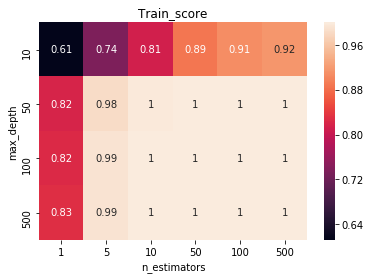

In [250]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

In [251]:
cv_auc=cv_auc.reshape(4,6)

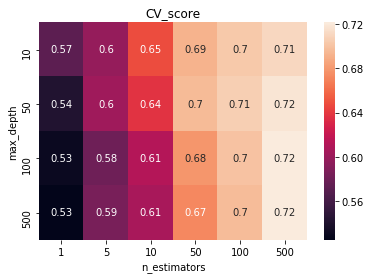

In [252]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

In [254]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

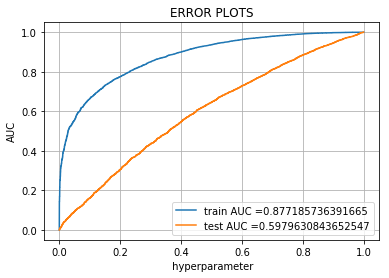

In [258]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier(n_estimators=100,max_depth=10,class_weight='balanced',n_jobs=-1)
clf.fit(X_train_final_bow,y_train)

y_train_pred = batch_predict(clf,X_train_final_bow)    
y_test_pred = batch_predict(clf,X_test_final_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [259]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    print(t)
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [260]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.5058489531632894
the maximum value of tpr*(1-fpr) 0.6240660874739294 for threshold 0.506
[[ 2769   594]
 [ 4619 14463]]
Test confusion matrix
0.4876034141942235
the maximum value of tpr*(1-fpr) 0.3320343635120426 for threshold 0.488
[[1040 1433]
 [4050 9977]]


In [261]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.5058489531632894
the maximum value of tpr*(1-fpr) 0.6240660874739294 for threshold 0.506
      0      1
0  2769    594
1  4619  14463


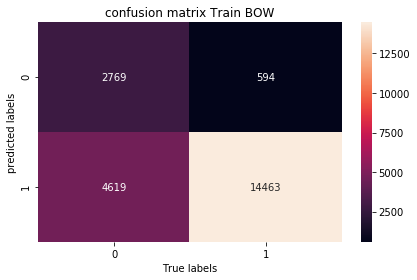

In [262]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train BOW")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [263]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.4876034141942235
the maximum value of tpr*(1-fpr) 0.3320343635120426 for threshold 0.488
      0     1
0  1040  1433
1  4050  9977


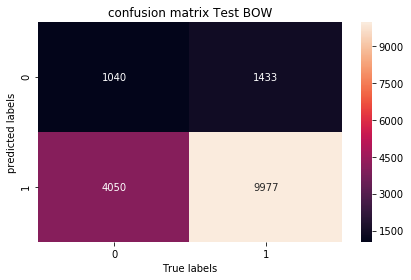

In [264]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test BOW")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

### 2.4.2 Applying Random Forests on TFIDF,<font color='red'> SET 2</font>

In [265]:
# Please write all the code with proper documentation

In [266]:
print(X_train_final_tfidf.shape)
print(X_test_final_tfidf.shape)
print(X_cv_final_tfidf.shape)

(22445, 6699)
(16500, 6699)
(11055, 6699)


In [267]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[10, 50, 100, 500]}
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
clf=GridSearchCV(rf,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(X_train_final_tfidf,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



In [268]:
train_auc=train_auc.reshape(4,6)

In [269]:
cv_auc=cv_auc.reshape(4,6)

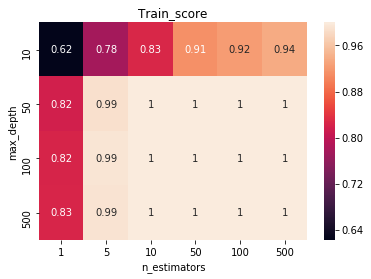

In [270]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

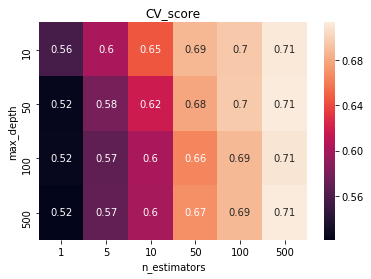

In [271]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

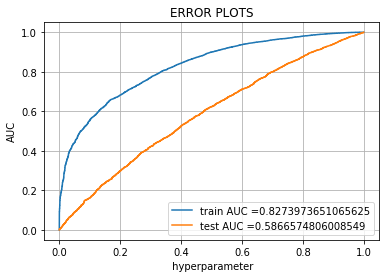

In [274]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier(n_estimators=25,max_depth=10,class_weight='balanced',n_jobs=-1)
clf.fit(X_train_final_bow,y_train)

y_train_pred = batch_predict(clf,X_train_final_bow)    
y_test_pred = batch_predict(clf,X_test_final_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [275]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.5104179223819192
the maximum value of tpr*(1-fpr) 0.5478097204038237 for threshold 0.51
[[ 2595   768]
 [ 5535 13547]]
Test confusion matrix
0.4947564935889024
the maximum value of tpr*(1-fpr) 0.3176950258629803 for threshold 0.495
[[1014 1459]
 [4183 9844]]


In [276]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.5104179223819192
the maximum value of tpr*(1-fpr) 0.5478097204038237 for threshold 0.51
      0      1
0  2595    768
1  5535  13547


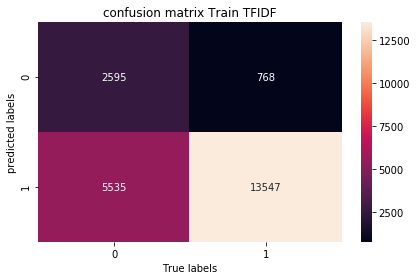

In [277]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train TFIDF")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [278]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.4947564935889024
the maximum value of tpr*(1-fpr) 0.3176950258629803 for threshold 0.495
      0     1
0  1014  1459
1  4183  9844


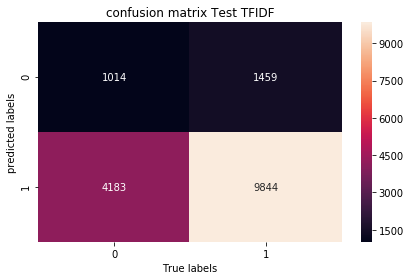

In [279]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test TFIDF")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

### 2.4.3 Applying Random Forests on AVG W2V,<font color='red'> SET 3</font>

In [355]:
# Please write all the code with proper documentation

In [268]:
print(w2v_final_train.shape)
print(w2v_final_test.shape)
print(w2v_final_cv.shape)

(49041, 612)
(36052, 612)
(24155, 612)


In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[10, 50, 100, 500]}
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
clf=GridSearchCV(rf,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(w2v_final_train,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


In [358]:
train_auc=train_auc.reshape(4,6)

In [359]:
cv_auc=cv_auc.reshape(4,6)

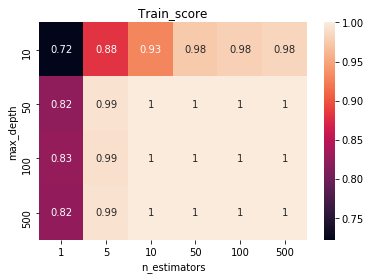

In [360]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

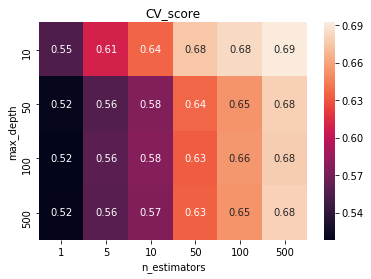

In [361]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

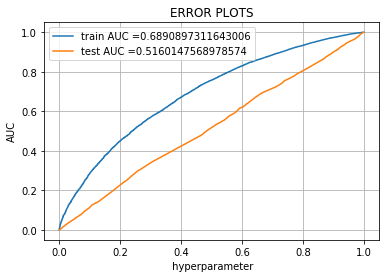

In [363]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier(n_estimators=5,max_depth=5,class_weight='balanced',n_jobs=-1)
clf.fit(w2v_final_train,y_train)

y_train_pred = batch_predict(clf,w2v_final_train)    
y_test_pred = batch_predict(clf,w2v_final_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [364]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.5002217285711095
the maximum value of tpr*(1-fpr) 0.4043287158435738 for threshold 0.5
[[ 4544  2882]
 [14117 27498]]
Test confusion matrix
0.6630812868202315
the maximum value of tpr*(1-fpr) 0.2588245259169595 for threshold 0.663
[[ 5172   287]
 [28778  1815]]


In [365]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.5002217285711095
the maximum value of tpr*(1-fpr) 0.4043287158435738 for threshold 0.5
       0      1
0   4544   2882
1  14117  27498


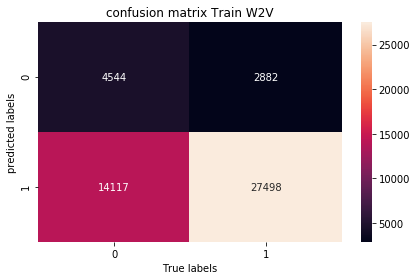

In [369]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train W2V")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [370]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.6630812868202315
the maximum value of tpr*(1-fpr) 0.2588245259169595 for threshold 0.663
       0     1
0   5172   287
1  28778  1815


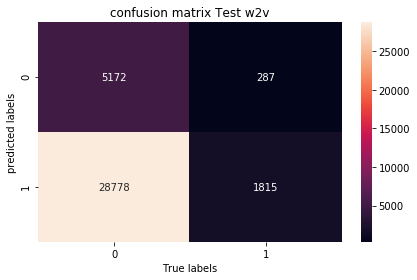

In [371]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test w2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

### 2.4.4 Applying Random Forests on TFIDF W2V,<font color='red'> SET 4</font>

In [372]:
# Please write all the code with proper documentation

In [269]:
print(tfidf_w2v_final_train.shape)
print(tfidf_w2v_final_test.shape)
print(tfidf_w2v_final_cv.shape)

(49041, 612)
(36052, 612)
(24155, 612)


In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[10, 50, 100, 500]}
rf=RandomForestClassifier(class_weight='balanced',n_jobs=-1)
clf=GridSearchCV(rf,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(tfidf_w2v_final_train,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [375]:
train_auc=train_auc.reshape(4,6)

In [376]:
cv_auc=cv_auc.reshape(4,6)

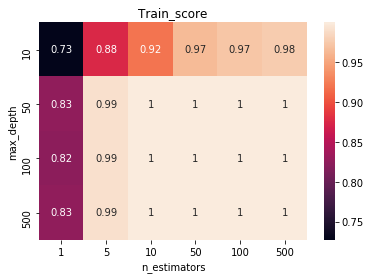

In [377]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

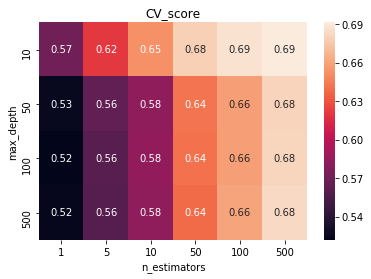

In [378]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

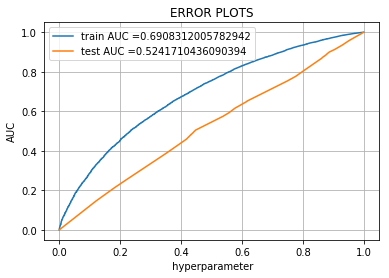

In [379]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

clf =RandomForestClassifier(n_estimators=5,max_depth=5,class_weight='balanced',n_jobs=-1)
clf.fit(tfidf_w2v_final_train,y_train)

y_train_pred = batch_predict(clf,tfidf_w2v_final_train)    
y_test_pred = batch_predict(clf,tfidf_w2v_final_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [380]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.4968110676797638
the maximum value of tpr*(1-fpr) 0.40761144303719804 for threshold 0.497
[[ 4659  2767]
 [14578 27037]]
Test confusion matrix
0.7253966920415875
the maximum value of tpr*(1-fpr) 0.27886421438857 for threshold 0.725
[[ 3085  2374]
 [15765 14828]]


In [381]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.4968110676797638
the maximum value of tpr*(1-fpr) 0.40761144303719804 for threshold 0.497
       0      1
0   4659   2767
1  14578  27037


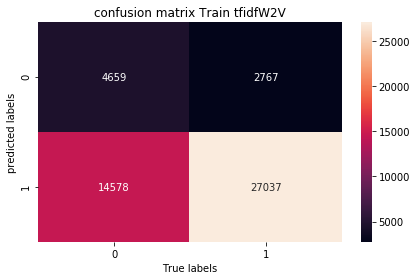

In [382]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train tfidfW2V")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [383]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.7253966920415875
the maximum value of tpr*(1-fpr) 0.27886421438857 for threshold 0.725
       0      1
0   3085   2374
1  15765  14828


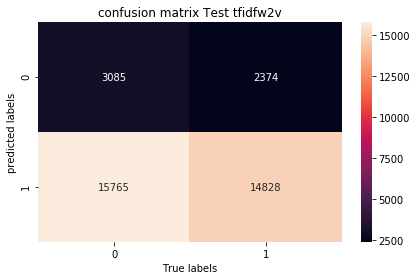

In [384]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test tfidfw2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

<h2>2.5 Applying GBDT</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

### 2.5.1 Applying XGBOOST on BOW,<font color='red'> SET 1</font>

In [0]:
# Please write all the code with proper documentation

In [280]:
print(X_train_final_bow.shape)
print(X_test_final_bow.shape)
print(X_cv_final_bow.shape)

(22445, 6699)
(16500, 6699)
(11055, 6699)


In [281]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [288]:
from lightgbm import LGBMClassifier

In [289]:
from sklearn.model_selection import GridSearchCV
parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[10, 50, 100, 500]}
xg=LGBMClassifier(class_weight='balanced')
clf=GridSearchCV(xg,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(X_train_final_bow,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [290]:
train_auc=train_auc.reshape(4,6)

In [291]:
cv_auc=cv_auc.reshape(4,6)

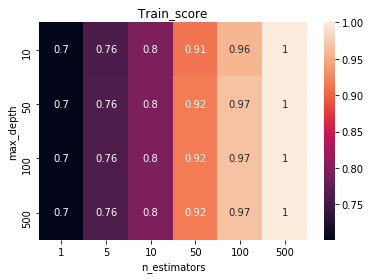

In [292]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

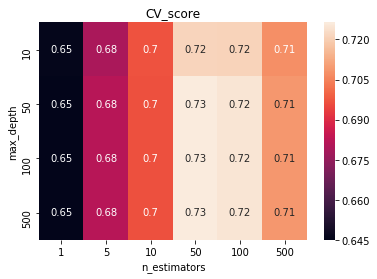

In [293]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

In [294]:
def batch_predict(clf, data):
    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your cr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

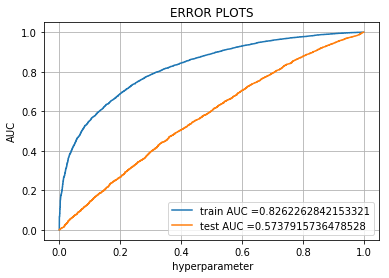

In [317]:
from sklearn.metrics import roc_curve, auc
from lightgbm import LGBMClassifier

clf =LGBMClassifier(n_estimators=25,max_depth=16,class_weight='balanced',n_jobs=-1)
clf.fit(X_train_final_bow,y_train)

y_train_pred = batch_predict(clf,X_train_final_bow)    
y_test_pred = batch_predict(clf,X_test_final_bow)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [318]:
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    print(t)
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [319]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.49391323415016875
the maximum value of tpr*(1-fpr) 0.5582578441452875 for threshold 0.494
[[ 2550   813]
 [ 5033 14049]]
Test confusion matrix
0.4379435297468092
the maximum value of tpr*(1-fpr) 0.3069206170492463 for threshold 0.438
[[1664  809]
 [7987 6040]]


In [320]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.49391323415016875
the maximum value of tpr*(1-fpr) 0.5582578441452875 for threshold 0.494
      0      1
0  2550    813
1  5033  14049


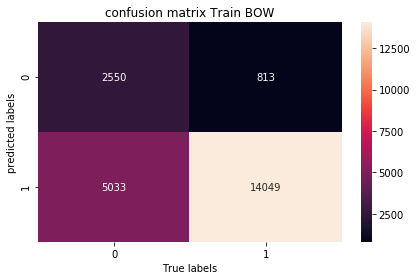

In [321]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train BOW")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [322]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.4379435297468092
the maximum value of tpr*(1-fpr) 0.3069206170492463 for threshold 0.438
      0     1
0  1664   809
1  7987  6040


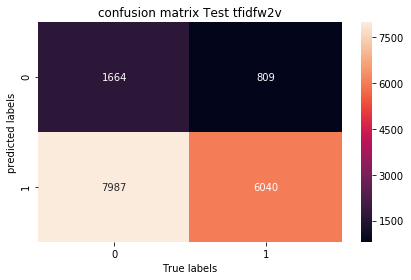

In [323]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test tfidfw2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

### 2.5.2 Applying XGBOOST on TFIDF,<font color='red'> SET 2</font>

In [293]:
# Please write all the code with proper documentation

In [271]:
print(X_train_final_tfidf.shape)
print(X_test_final_tfidf.shape)
print(X_cv_final_tfidf.shape)

(49041, 8400)
(36052, 8400)
(24155, 8400)


In [295]:
from xgboost import XGBClassifier
parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[10, 50, 100, 500]}
xg=XGBClassifier(class_weight='balanced')
clf=GridSearchCV(xg,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(X_train_final_tfidf,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [296]:
train_auc=train_auc.reshape(4,6)

In [298]:
cv_auc=cv_auc.reshape(4,6)

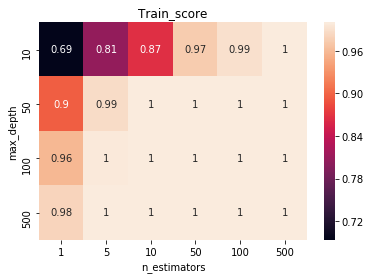

In [299]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

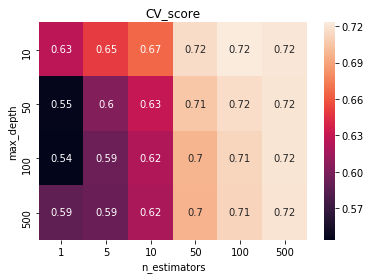

In [300]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

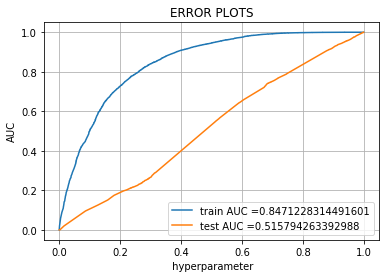

In [301]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

clf =XGBClassifier(n_estimators=10,max_depth=10,class_weight='balanced',n_jobs=-1)
clf.fit(X_train_final_tfidf,y_train)

y_train_pred = batch_predict(clf,X_train_final_tfidf)    
y_test_pred = batch_predict(clf,X_test_final_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [302]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.7202107
the maximum value of tpr*(1-fpr) 0.5935384956797007 for threshold 0.72
[[ 5664  1762]
 [ 9231 32384]]
Test confusion matrix
0.77167153
the maximum value of tpr*(1-fpr) 0.26802355517789783 for threshold 0.772
[[ 4262  1197]
 [24432  6161]]


In [303]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.7202107
the maximum value of tpr*(1-fpr) 0.5935384956797007 for threshold 0.72
      0      1
0  5664   1762
1  9231  32384


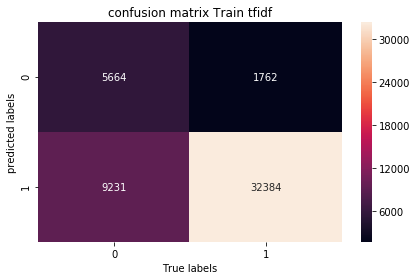

In [304]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train tfidf")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [305]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.77167153
the maximum value of tpr*(1-fpr) 0.26802355517789783 for threshold 0.772
       0     1
0   4262  1197
1  24432  6161


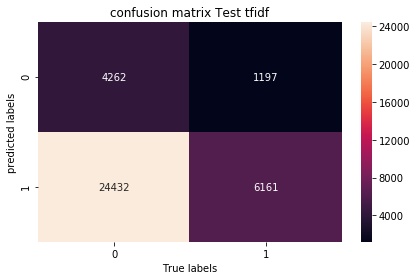

In [307]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test tfidf")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

### 2.5.3 Applying XGBOOST on AVG W2V,<font color='red'> SET 3</font>

In [308]:
# Please write all the code with proper documentation

# Due to overheating and motherboard issues, we have considered only 25k points to perform GBDT for SET 3 and SET 4

In [268]:
print(w2v_final_train.shape)
print(w2v_final_test.shape)
print(w2v_final_cv.shape)

(49041, 612)
(36052, 612)
(24155, 612)


In [259]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[1,3,5,10]}
xg=XGBClassifier(class_weight='balanced')
clf=GridSearchCV(xg,parameters,cv=3,scoring='roc_auc')
clf.fit(w2v_final_train,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [260]:
train_auc=train_auc.reshape(4,6)

In [261]:
cv_auc=cv_auc.reshape(4,6)

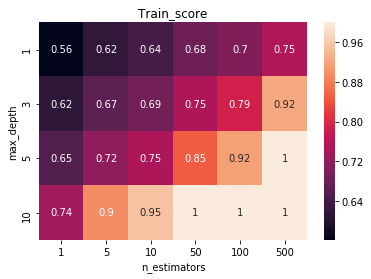

In [262]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

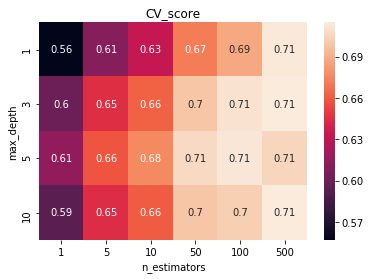

In [263]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

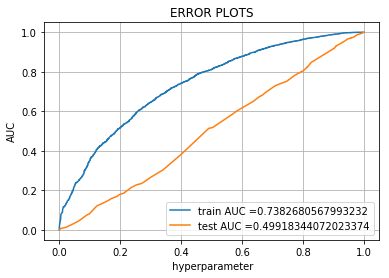

In [291]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

clf =XGBClassifier(n_estimators=15,max_depth=3,class_weight='balanced')
clf.fit(w2v_final_train,y_train)

y_train_pred = batch_predict(clf,w2v_final_train)    
y_test_pred = batch_predict(clf,w2v_final_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [248]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.83043474
the maximum value of tpr*(1-fpr) 0.5557392774341627 for threshold 0.83
[[1238  459]
 [2269 7256]]
Test confusion matrix
0.7861664
the maximum value of tpr*(1-fpr) 0.24160358945063318 for threshold 0.786
[[ 115 1133]
 [ 589 6413]]


In [249]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.83043474
the maximum value of tpr*(1-fpr) 0.5557392774341627 for threshold 0.83
      0     1
0  1238   459
1  2269  7256


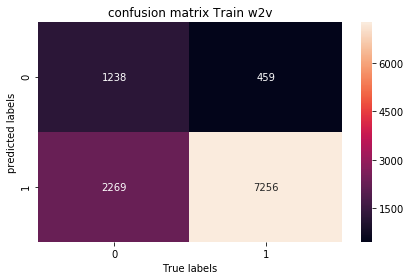

In [250]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train w2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [251]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.7861664
the maximum value of tpr*(1-fpr) 0.24160358945063318 for threshold 0.786
     0     1
0  115  1133
1  589  6413


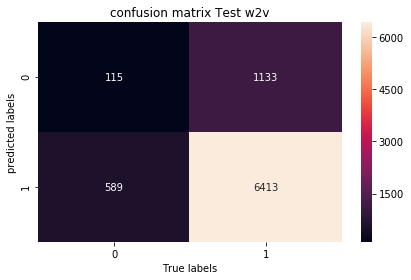

In [252]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test w2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

### 2.5.4 Applying XGBOOST on TFIDF W2V,<font color='red'> SET 4</font>

In [253]:
# Please write all the code with proper documentation

In [254]:
print(tfidf_w2v_final_train.shape)
print(tfidf_w2v_final_test.shape)
print(tfidf_w2v_final_cv.shape)

(11222, 612)
(8250, 612)
(5528, 612)


In [256]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
parameters={'n_estimators': [1, 5, 10, 50, 100, 500],'max_depth':[1,3,5,10]}
xg=XGBClassifier(class_weight='balanced')
clf=GridSearchCV(xg,parameters,cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(tfidf_w2v_final_train,y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

In [257]:
train_auc=train_auc.reshape(4,6)

In [258]:
cv_auc=cv_auc.reshape(4,6)

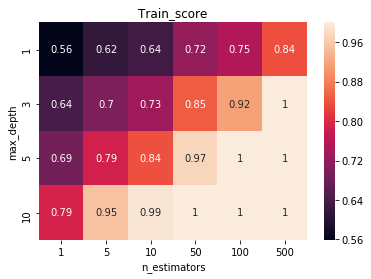

In [259]:
ax=sns.heatmap(data=train_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="Train_score")
plt.show()

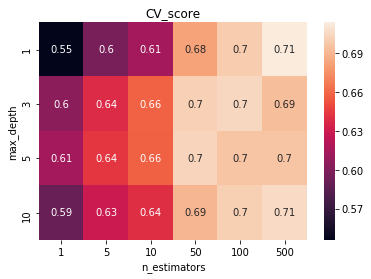

In [260]:
ax=sns.heatmap(data=cv_auc,xticklabels=np.array(parameters['n_estimators']),yticklabels=np.array(parameters['max_depth']),annot=True)
ax.set(xlabel="n_estimators",ylabel="max_depth")
ax.set_title(label="CV_score")
plt.show()

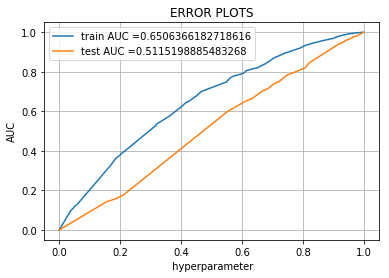

In [284]:
from sklearn.metrics import roc_curve, auc
from xgboost import XGBClassifier

clf =XGBClassifier(n_estimators=15,max_depth=1,class_weight='balanced')
clf.fit(tfidf_w2v_final_train,y_train)

y_train_pred = batch_predict(clf,tfidf_w2v_final_train)    
y_test_pred = batch_predict(clf,tfidf_w2v_final_test)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel(" hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [285]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))

Train confusion matrix
0.77640706
the maximum value of tpr*(1-fpr) 0.3765125116579049 for threshold 0.776
[[ 992  705]
 [3390 6135]]
Test confusion matrix
0.7936496
the maximum value of tpr*(1-fpr) 0.26816147767304577 for threshold 0.794
[[ 559  689]
 [2811 4191]]


In [286]:
con_mat_train_bow=pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_tpr)))
print(con_mat_train_bow)

0.77640706
the maximum value of tpr*(1-fpr) 0.3765125116579049 for threshold 0.776
      0     1
0   992   705
1  3390  6135


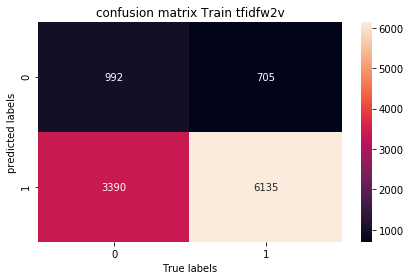

In [287]:
axis=plt.subplot()
sns.heatmap(con_mat_train_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Train tfidfw2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

In [288]:
con_mat_test_bow=pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_tpr)))
print(con_mat_test_bow)

0.7936496
the maximum value of tpr*(1-fpr) 0.26816147767304577 for threshold 0.794
      0     1
0   559   689
1  2811  4191


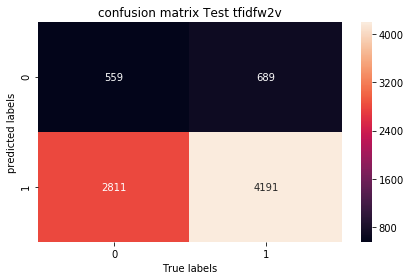

In [289]:
axis=plt.subplot()
sns.heatmap(con_mat_test_bow,annot=True,ax=axis,fmt='g')
axis.set_ylabel("predicted labels")
axis.set_xlabel("True labels")
axis.set_title("confusion matrix Test tfidfw2v")
axis.xaxis.set_ticklabels(['0','1'])
plt.tight_layout()

<h1>3. Conclusion</h1>

### Random Forest Pretty Table

In [292]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "n_estimetor", "max_depth", "AUC Train", "AUC Test"]

x.add_row(["BOW", 10, 10, 74.80,57.57])
x.add_row(["TFIDF", 10, 5, 68,54])
x.add_row(["W2V", 5, 5, 68,51])
x.add_row(["TFIDF-W2V", 5, 5, 69,52])

print(x)


+------------+-------------+-----------+-----------+----------+
| Vectorizer | n_estimetor | max_depth | AUC Train | AUC Test |
+------------+-------------+-----------+-----------+----------+
|    BOW     |      10     |     10    |    74.8   |  57.57   |
|   TFIDF    |      10     |     5     |     68    |    54    |
|    W2V     |      5      |     5     |     68    |    51    |
| TFIDF-W2V  |      5      |     5     |     69    |    52    |
+------------+-------------+-----------+-----------+----------+


### GBDT Pretty Table

In [293]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "n_estimetor", "max_depth", "AUC Train", "AUC Test"]

x.add_row(["BOW", 10, 5, 78,51])
x.add_row(["TFIDF", 10, 10, 84,51])
x.add_row(["W2V", 15, 3, 74,49])
x.add_row(["TFIDF-W2V", 15, 1, 65,51])

print(x)

+------------+-------------+-----------+-----------+----------+
| Vectorizer | n_estimetor | max_depth | AUC Train | AUC Test |
+------------+-------------+-----------+-----------+----------+
|    BOW     |      10     |     5     |     78    |    51    |
|   TFIDF    |      10     |     10    |     84    |    51    |
|    W2V     |      15     |     3     |     74    |    49    |
| TFIDF-W2V  |      15     |     1     |     65    |    51    |
+------------+-------------+-----------+-----------+----------+


## SUMMARY:

- The first thing we found out that the dataset is an imbalanced dataset.
- Then during the preprocessing part of the categorical data we found 3 missing values inside "teachers_prefix".
- We preprocess the categorical features like state,teacher_prefix,project_grade_category for response coding.
- We remove stopwords,tags, and other unnecessary things from the "essay" and "project_title".
- Then we split the data into train,test,cv.
- Here Our target column is "project_is_approved".
- Then we form bow on the "essay" and "project_title".we only fit the count vectorizer on train then transform on test,cv data to avoid data leakage.
- Then we choose max_features=5000 to fit on the top 5000 words.
- In the tfidf we use unigram,bigram,trigram to obtain the matrix.
- We create the martix of avgw2v and tfidfavg w2v and hstack with all the others matrix.
- We make the final matrix of BOW,TFIDF,AVGW2V,TFIDFW2V.
- We found max_depth and min_samples_split for Decision tree by applying GridSearch.
- We plot the train and test AUC plot.
- We print the confusion matrix for the BOW,TFIDF,AVGW2V,TFIDFAVGW2V.
- We have performed the same task on GBDT.